In [2]:
# PLEASE ENTER THE NAME OF THE DATASET ASSIGNED TO YOU AS INDICATED ON BLACKBOARD
DATASET = 'uwetech-dataset04'

import random
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import datetime

def load_data(DATASET):
    dataset_list = ['uwetech-dataset01', 'uwetech-dataset02', 'uwetech-dataset03', 'uwetech-dataset04']
    if DATASET in dataset_list:
        email_data = pd.read_csv('./' + DATASET + '/email_data.csv', parse_dates=True, index_col=0)
        file_data = pd.read_csv('./' + DATASET + '/file_data.csv', parse_dates=True, index_col=0)
        web_data = pd.read_csv('./' + DATASET + '/web_data.csv', parse_dates=True, index_col=0)
        login_data = pd.read_csv('./' + DATASET + '/login_data.csv', parse_dates=True, index_col=0)
        usb_data = pd.read_csv('./' + DATASET + '/usb_data.csv', parse_dates=True, index_col=0)
        employee_data = pd.read_csv('./' + DATASET + '/employee_data.csv', index_col=0)
        
        email_data['datetime'] = pd.to_datetime(email_data['datetime'])
        file_data['datetime'] = pd.to_datetime(file_data['datetime'])
        web_data['datetime'] = pd.to_datetime(web_data['datetime'])
        login_data['datetime'] = pd.to_datetime(login_data['datetime'])
        usb_data['datetime'] = pd.to_datetime(usb_data['datetime'])
    else:
        print ("DATASET variable not defined - please refer to Blackboard for DATASET name")
        return
    return employee_data, login_data, usb_data, web_data, file_data, email_data

employee_data, login_data, usb_data, web_data, file_data, email_data = load_data(DATASET)

/tmp/ipykernel_3954/233739740.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  email_data = pd.read_csv('./' + DATASET + '/email_data.csv', parse_dates=True, index_col=0)
/tmp/ipykernel_3954/233739740.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  file_data = pd.read_csv('./' + DATASET + '/file_data.csv', parse_dates=True, index_col=0)
/tmp/ipykernel_3954/233739740.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  web_data = pd.read_csv('./' + DATASET + '/web_data.csv', parse_dates=True, index_col=0)
/tmp/ipykernel_3954/233739740.py:17: UserWarning: Could not i

In [3]:
employee_data

user       role                email     pc
0    usr-lqi  Technical  usr-lqi@uwetech.com    pc0
1    usr-kga   Security  usr-kga@uwetech.com    pc1
2    usr-wkx   Director  usr-wkx@uwetech.com    pc2
3    usr-sfo    Finance  usr-sfo@uwetech.com    pc3
4    usr-cgh   Security  usr-cgh@uwetech.com    pc4
..       ...        ...                  ...    ...
245  usr-nxs         HR  usr-nxs@uwetech.com  pc245
246  usr-rri         HR  usr-rri@uwetech.com  pc246
247  usr-agk    Finance  usr-agk@uwetech.com  pc247
248  usr-pcs         HR  usr-pcs@uwetech.com  pc248
249  usr-xfr         HR  usr-xfr@uwetech.com  pc249

[250 rows x 4 columns]

In [4]:
login_data

datetime     user  action     pc
0      2022-01-01 00:02:43  usr-zrp   login   pc15
1      2022-01-01 00:05:17  usr-evy   login   pc92
2      2022-01-01 00:15:12  usr-ubr   login  pc119
3      2022-01-01 00:18:24  usr-pnn   login  pc169
4      2022-01-01 00:30:04  usr-mbh   login  pc178
...                    ...      ...     ...    ...
151995 2022-10-31 23:48:21  usr-kmz  logoff  pc130
151996 2022-10-31 23:52:36  usr-sxl  logoff  pc201
151997 2022-10-31 23:56:04  usr-zog  logoff  pc206
151998 2022-10-31 23:59:09  usr-ubr  logoff  pc119
151999 2022-10-31 23:59:33  usr-gcn  logoff  pc118

[152000 rows x 4 columns]

In [5]:
 # This shows how to filter the login_data DataFrame by a particular set of usernames within a list
login_data[login_data['user'].isin(['usr-pcs'])]

datetime     user  action     pc
190    2022-01-01 08:29:10  usr-pcs   login  pc248
312    2022-01-01 15:49:58  usr-pcs  logoff  pc248
743    2022-01-02 09:50:08  usr-pcs   login  pc248
769    2022-01-02 15:02:33  usr-pcs  logoff  pc248
1217   2022-01-03 09:00:19  usr-pcs   login  pc248
...                    ...      ...     ...    ...
150814 2022-10-29 15:58:42  usr-pcs  logoff  pc248
151182 2022-10-30 08:12:23  usr-pcs   login  pc248
151266 2022-10-30 14:25:27  usr-pcs  logoff  pc248
151655 2022-10-31 07:42:20  usr-pcs   login  pc248
151796 2022-10-31 15:34:14  usr-pcs  logoff  pc248

[608 rows x 4 columns]

In [6]:
 # all_roles is an array/list of all job roles that are within our DataFrame
all_roles = employee_data['role'].unique()
all_roles

array(['Technical', 'Security', 'Director', 'Finance', 'Services',
       'Legal', 'HR'], dtype=object)

In [7]:
user_set = {}
user_set_emails = {}
all_roles = employee_data['role'].unique()
for role in all_roles:
    user_set[role] = list(employee_data[employee_data['role'] == role]['user'].values)
    user_set_emails[role] = list(employee_data[employee_data['role'] == role]['email'].values)

In [8]:
user_set['Director']

['usr-wkx',
 'usr-nhl',
 'usr-ffl',
 'usr-amg',
 'usr-zrp',
 'usr-xzx',
 'usr-sae',
 'usr-fpk',
 'usr-ezr',
 'usr-lpn',
 'usr-pfc',
 'usr-uks',
 'usr-gei',
 'usr-hmt',
 'usr-ykb',
 'usr-ukl',
 'usr-jpc',
 'usr-fgv',
 'usr-ter',
 'usr-mky',
 'usr-uzo',
 'usr-hmm',
 'usr-nkw',
 'usr-sxl',
 'usr-oks',
 'usr-zog',
 'usr-ptu',
 'usr-njc',
 'usr-zun',
 'usr-wxn',
 'usr-qbo']

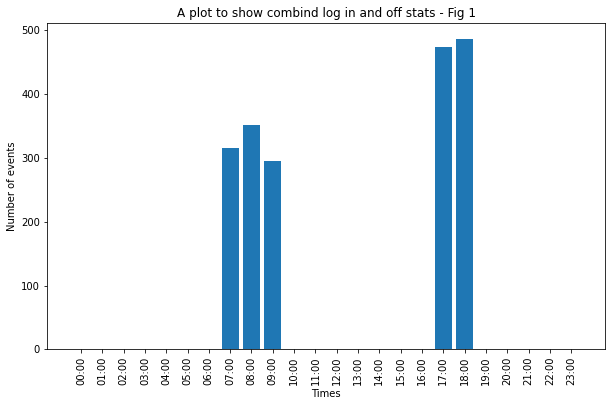

In [9]:
# Question 1: For all Finance staff members during the month of January, show the distribution of when users logon and logoff by hour using one or more Bar Charts, 
# and report the most common login and logoff time for this role.
# Hint: Once you have filtered the data to only Finance staff in January, count the number of logons and logoffs that occur in each hour of the day.

import numpy as np


january = login_data.loc[(login_data["datetime"] >= '2022-01-01 00:00:00') & (login_data["datetime"] <= '2022-02-01 00:00:00')]
finance_and_january = january.loc[january["user"].isin(user_set['Finance'])]


login_and_logoff = np.zeros(24)
login = np.zeros(24)
logoff = np.zeros(24)
for idenx, row in finance_and_january.iterrows():
    
    login_and_logoff[row["datetime"].hour] += 1 
    if row["action"] == 'login':
        login[row["datetime"].hour] += 1
    elif row["action"] == 'logoff':
        logoff[row["datetime"].hour] += 1

times = []
for i in range(0,24):
    times.append(f'{str(i).zfill(2)}:00')
    
plt.figure(figsize=(10,6))
plt.bar(times, login_and_logoff)
plt.xticks(rotation=90)
plt.title("A plot to show combind log in and off stats - Fig 1")
plt.ylabel("Number of events")
plt.xlabel("Times")
plt.show()

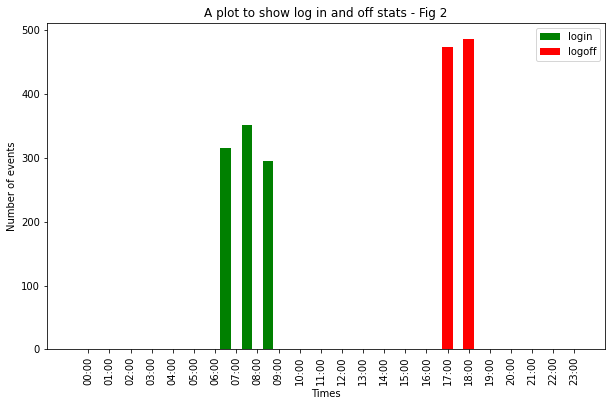

In [10]:
plt.figure(figsize=(10,6))
plt.bar(x=np.arange(0,24), height=login, color='green', width=0.5, label='login')
plt.bar(x=np.arange(0.5,24.5,1), height=logoff, color='red', width=0.5, label='logoff')
plt.title("A plot to show log in and off stats - Fig 2")
plt.xticks(ticks=np.arange(0.5,24.5,1), labels=times, rotation=90)
plt.ylabel("Number of events")
plt.xlabel("Times")
plt.legend()
plt.show()

For the above question I have split the data up into two graphs. 
Fig 1 shows the data combind.
Fig 2 shows the data seperated. 
It shows that peak times for this event are between 6am and 9am, then between 5pm and 6pm. 
It shows that poeple only log on during the earlier peak and only log off during the later peak. 

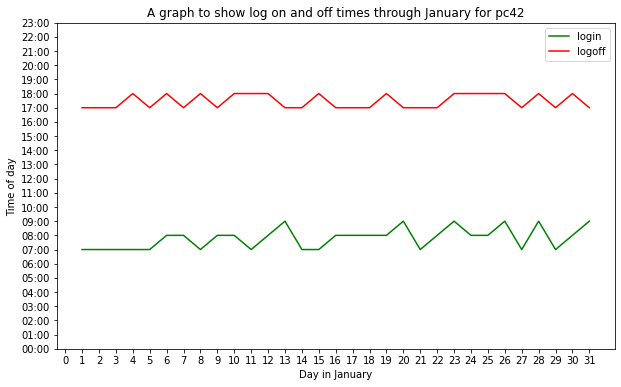

In [11]:
# Question 2: Plot a multi-line chart that shows the logon and logoff times during the month of January for the user of pc42.
# Hint: Filter the data as you need, and make two calls to plt.plot().

pcfourtwo_tracker = finance_and_january[finance_and_january['pc'] == 'pc42']

login_pcfourtwo = pcfourtwo_tracker[pcfourtwo_tracker['action'] == 'login']
logoff_pcfourtwo = pcfourtwo_tracker[pcfourtwo_tracker['action'] == 'logff']
#x = dates 
#y = times
plt.figure(figsize=(10,6))
plt.title("A graph to show log on and off times through January for pc42")
plt.xlabel("Day in January")
plt.ylabel("Time of day")
x_login = []
y_login = []
x_logoff = []
y_logoff = []
for index, row in pcfourtwo_tracker.iterrows(): 
    date =row['datetime']
    if row['action'] == 'login':
        x_login.append(date.day)
        y_login.append(date.hour)
    elif row['action'] == 'logoff':
        x_logoff.append(date.day)
        y_logoff.append(date.hour)
         
plt.plot(x_login, y_login, label="login", color="green")
plt.plot(x_logoff, y_logoff, label="logoff", color="red")    
plt.xticks(np.arange(0,32), np.arange(0,32))
plt.yticks(np.arange(0,24), times)
plt.legend()




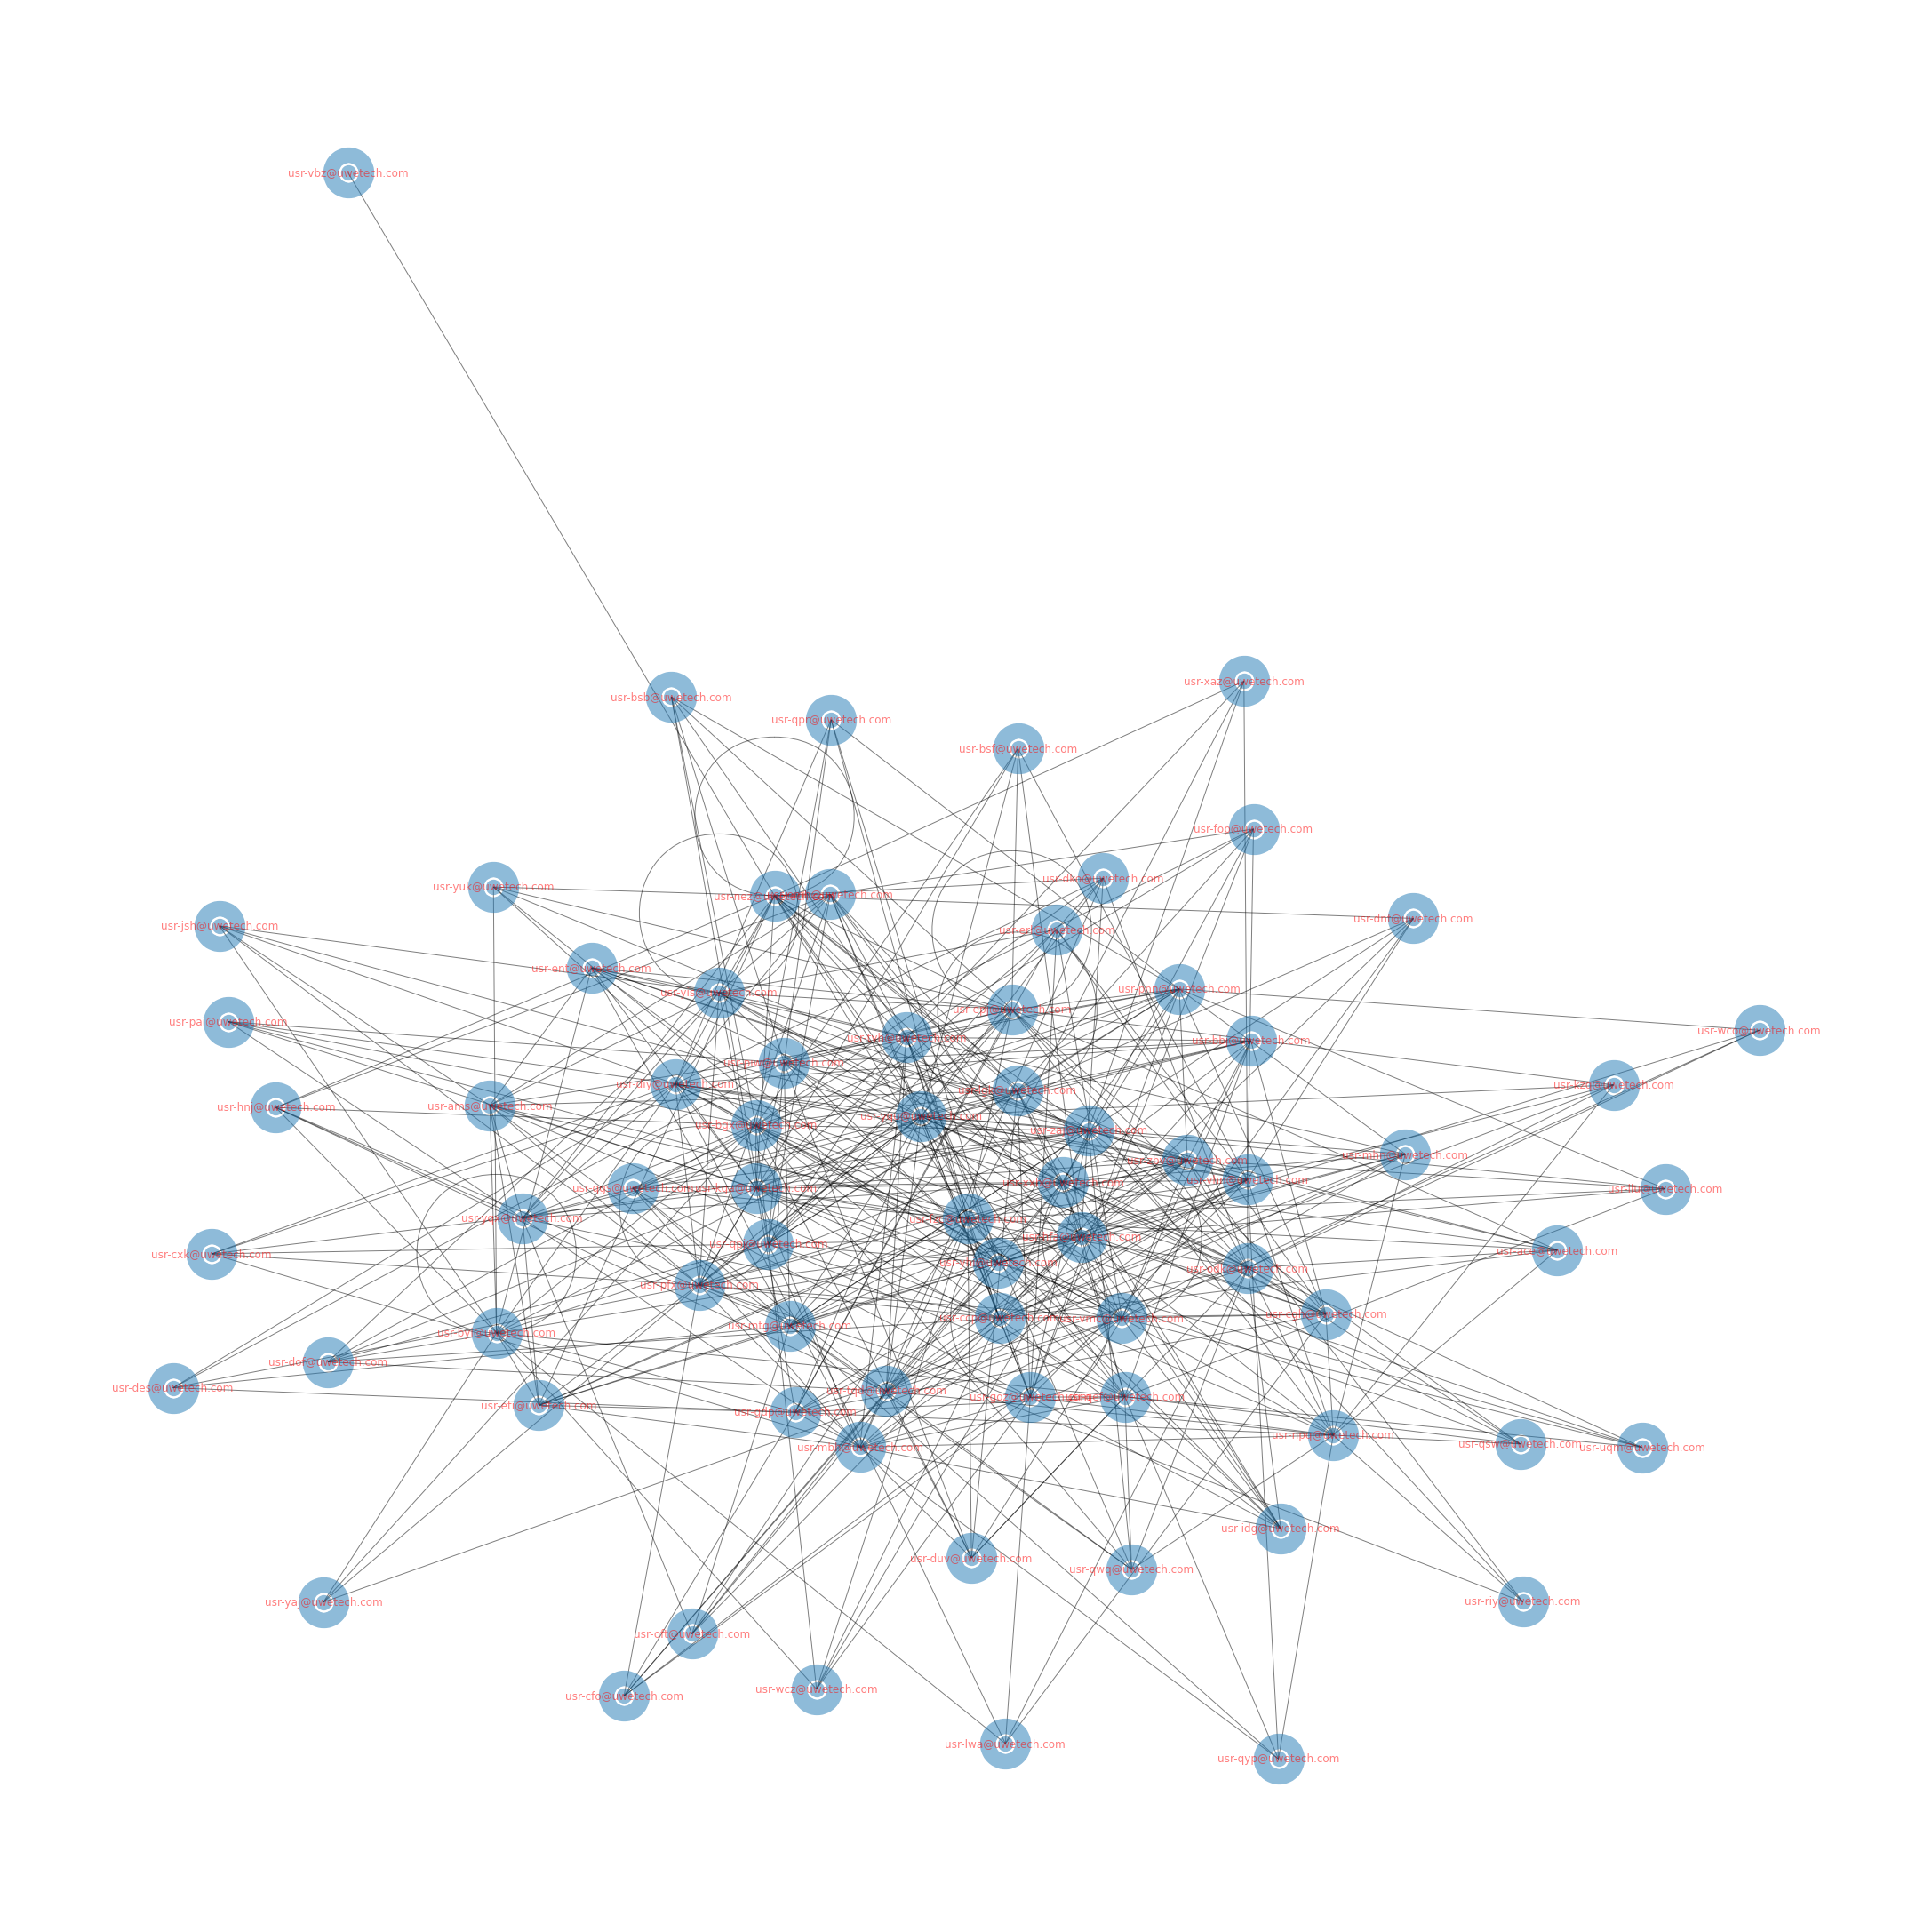

In [12]:
# Question 3: Use a node-link graph to show all emails sent by Security staff on January 5th 2022. 
# Your node link graph may show only those users who receive emails from the select senders.
# Hint: Filter the data and then refer back to Question 4 from Part 1 to format the data correctly
import networkx as nx

security_series = employee_data[employee_data["user"].isin(user_set['Security'])]
security_emails = security_series["email"].unique()
email_data_sent_from_security = email_data[email_data["sender"].isin(security_emails)]

email_data_sent_from_security = email_data_sent_from_security[(email_data_sent_from_security["datetime"] >= '2022-01-05 00:00:00') & \
    (email_data_sent_from_security["datetime"] <= '2022-01-06 00:00:00')]
email_data_sent_from_security


edges_df = pd.DataFrame({'from':email_data_sent_from_security["sender"].tolist(), 'to':email_data_sent_from_security["recipient"].tolist()})

G = nx.from_pandas_edgelist(edges_df, 'from', 'to')

plt.figure(figsize=(30,30))
nx.draw(G, with_labels = True, font_color="red", alpha=0.5,linewidths=40)

plt.show()

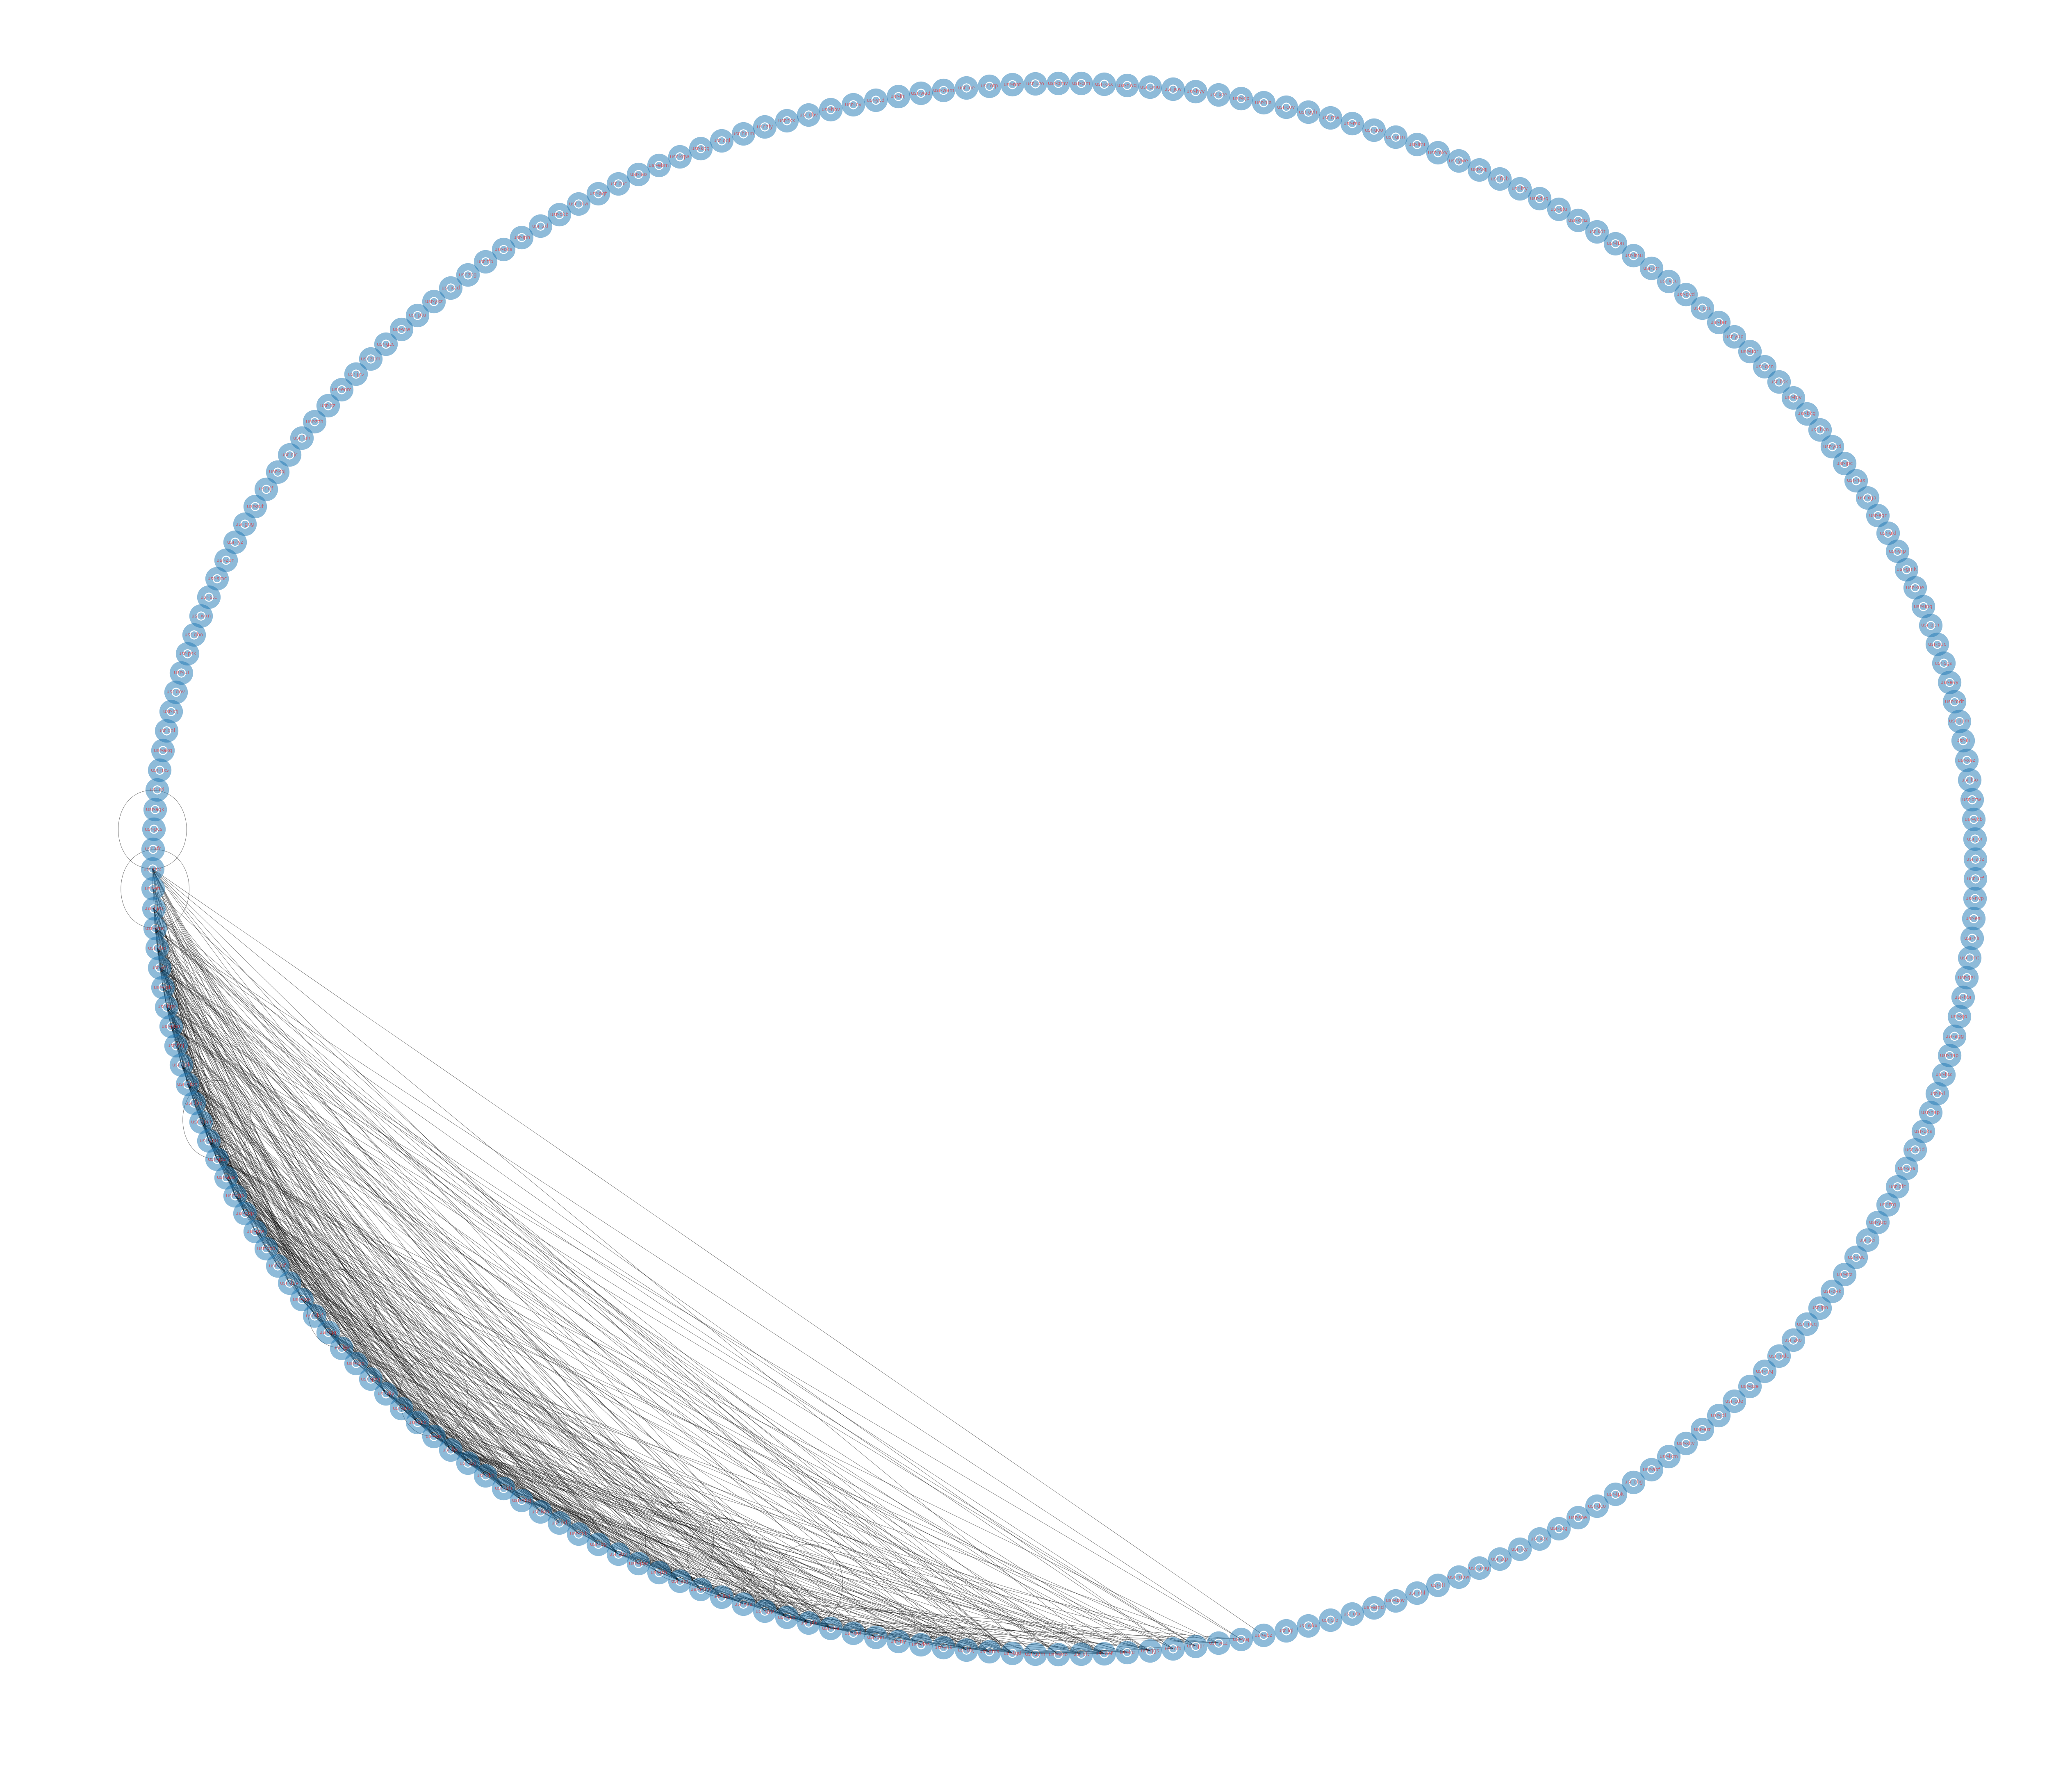

In [13]:
#(Advanced) Question 4: Extend the above, now showing a node for every possible user. 
#The edge connections should be as above, for emails sent by Security staff on 5th January 2022. You should use a shell layout for your network plot.

#deleted the any info after @ to save space on the graph
new_nodes = []

for node in G.nodes:
    new_nodes.append(node.split('@')[0])
    
all_users = employee_data['email'].unique()
for user in all_users: 
    if user not in new_nodes: 
        new_nodes.append(user.split('@')[0])

edges_df = pd.DataFrame({'from':[x.split('@')[0] for x in email_data_sent_from_security["sender"].tolist()], \
    'to':[x.split('@')[0] for x in email_data_sent_from_security["recipient"].tolist()]})

edges = []
for index, row in edges_df.iterrows():
    edges.append((row["from"], row["to"]))  

        
G2 = nx.Graph()
G2.add_nodes_from(new_nodes)
G2.add_edges_from(edges)

        
plt.figure(figsize=(70,60))
pos= nx.shell_layout(G2, scale = 2)
nx.draw(G2, pos=pos, with_labels = True, font_color="red", alpha=0.5,linewidths=40)

plt.show()

**In the above graph I have shorted the emails to just there prefix - removing anything after the @ to make the graph clearer**

In [14]:
# Question 5: Show a comparison between the files accessed by HR staff, Services staff, and Security staff, during January. 
# You will need to think of a suitable way to convey this information within a single plot so that comparison of activity can be made easily.
# Hint: Think which plot enables you to make comparisons between two attributes, 
# and then think what the attributes would need to be for mapping three job roles against the possible set of files accessed.
qfive_user_set = []
qfive_user_set = user_set['HR']
print(len(user_set['HR']))
print(len(qfive_user_set))

print(len(user_set['Services']))
qfive_user_set.extend(user_set['Services'])
print(len(qfive_user_set))

print(len(user_set['Services']))
qfive_user_set.extend(user_set['Security'])
print(len(qfive_user_set))


#filter for january
january_file_data = file_data[(file_data['datetime'] >= '2022-01-01 00:00:00') & (file_data['datetime'] < '2022-02-01 00:00:00')]
#filter for users 
january_file_data = january_file_data[january_file_data['user'].isin(qfive_user_set)]
unique_files = january_file_data['filename'].unique()
unique_files

38
38
38
76
38
111


array(['/security/physical', '/docs', '/security/estates', '/security',
       '/security/grounds', '/docs/clients', '/system/site', '/system',
       '/system/suppliers', '/docs/employment', '/docs/resignation',
       '/private', '/private/staffpay', '/private/staffreview'],
      dtype=object)

The above files are the only ones accessed by the selected staff members 

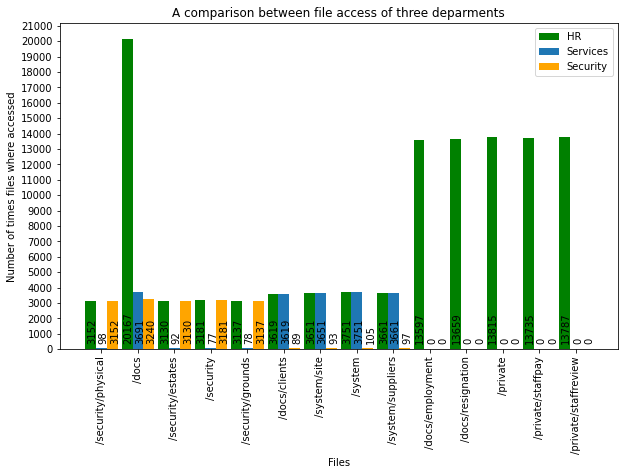

In [15]:
number_of_unique_files = len(unique_files)

hr_data = january_file_data[january_file_data['user'].isin(user_set['HR'])]
hr_heights = np.zeros(number_of_unique_files)
for index, file in enumerate(unique_files):
    hr_heights[index] = len(hr_data[hr_data['filename'] == file])
    
    
services_data = january_file_data[january_file_data['user'].isin(user_set['Services'])]
services_heights = np.zeros(number_of_unique_files)
for index, file in enumerate(unique_files):
    services_heights[index] = len(services_data[services_data['filename'] == file])
    

security_data = january_file_data[january_file_data['user'].isin(user_set['Security'])]
security_heights = np.zeros(number_of_unique_files)
for index, file in enumerate(unique_files):
    security_heights[index] = len(security_data[security_data['filename'] == file])
    

max_height = max([max(security_heights), max(services_heights), max(hr_heights)])
max_height = (int(max_height / 1000)*1000)+2000
       

plt.figure(figsize=(10,6))
plt.bar(x=np.arange(0,number_of_unique_files), height=hr_heights, color='green', width=0.3, label='HR')
plt.bar(x=np.arange(0.3,number_of_unique_files+0.3,1), height=services_heights, width=0.3, label='Services')
plt.bar(x=np.arange(0.6,number_of_unique_files+0.6,1), height=security_heights, color='orange', width=0.3, label='Security')

for file in range(number_of_unique_files):
    plt.text(file-0.1, 500, f'{str(int(hr_heights[file]))}\n{str(int(services_heights[file]))}\n{str(int(security_heights[file]))}', rotation=90)

plt.title("A comparison between file access of three deparments")
plt.xticks(ticks=np.arange(0.3,number_of_unique_files+0.3,1), labels=unique_files, rotation=90)
plt.yticks(ticks=np.arange(0,max_height,1000), labels=np.arange(0,max_height,1000))
plt.ylabel("Number of times files where accessed")
plt.xlabel("Files")
plt.legend()
plt.show()

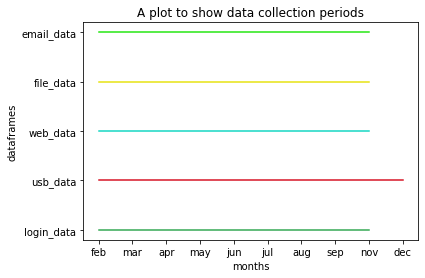

In [16]:

# Question 6: Carry on your own investigation to find the anomalous activity across all data files provided. 
# Provide clear evidence and justification for your investigative steps.
# Marks are awarded for: 
# a clear explanation of the steps you take to complete your investigation (5)
# suitable use of data analysis with clear explanation (6)
# suitable use of visualisation methods with clear annotation (6)
# identifying all of the suspicious events (8)
suspicous_users = []

labels = ['login_data', 'usb_data', 'web_data', 'file_data', 'email_data']
months = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "nov", "dec"]

login_period = np.arange(min(login_data['datetime']).month, max(login_data['datetime']).month)
usb_period = np.arange(min(usb_data['datetime']).month, max(usb_data['datetime']).month)
web_period = np.arange(min(web_data['datetime']).month, max(web_data['datetime']).month)
file_period = np.arange(min(file_data['datetime']).month, max(file_data['datetime']).month)
email_period = np.arange(min(email_data['datetime']).month, max(email_data['datetime']).month)

plt.plot(months[login_period[0]:login_period[-1]+1], [1]*len(login_period), label='login_period', color='#32a852')
plt.plot(months[usb_period[0]:usb_period[-1]+1], [2]*len(usb_period), label='usb_period', color='#d61324')
plt.plot(months[web_period[0]:web_period[-1]+1], [3]*len(web_period), label='web_period', color='#13d6c2')
plt.plot(months[file_period[0]:file_period[-1]+1], [4]*len(file_period), label='file_period', color='#e6e210')
plt.plot(months[email_period[0]:email_period[-1]+1], [5]*len(email_period), label='email_period', color='#22e610')

plt.title("A plot to show data collection periods")
plt.ylabel("dataframes")
plt.yticks(np.arange(1,6), labels)
plt.xlabel("months")
plt.show()



The above plot shows over what time period data was collected, this is useful to gauge a scale of the data.

In [17]:


unautherized_login_access = []

for index, row in login_data.iterrows():
    user_info = employee_data[employee_data['user'] == row['user']]
    pc_used = row['pc']
    pc_assigned = user_info['pc'].tolist()
    if pc_used not in pc_assigned:
        unautherized_login_access.append(row.tolist())
        
unautherized_login_access = pd.DataFrame(data=unautherized_login_access, columns=login_data.columns.values.tolist())
unautherized_login_access
    


Empty DataFrame
Columns: [datetime, user, action, pc]
Index: []

I first had a look to see if any users had loged into a PC that wasn't assigned to them, this could indicate a suspious event. But the result came back negative.
As is shown by the empty dataframe above

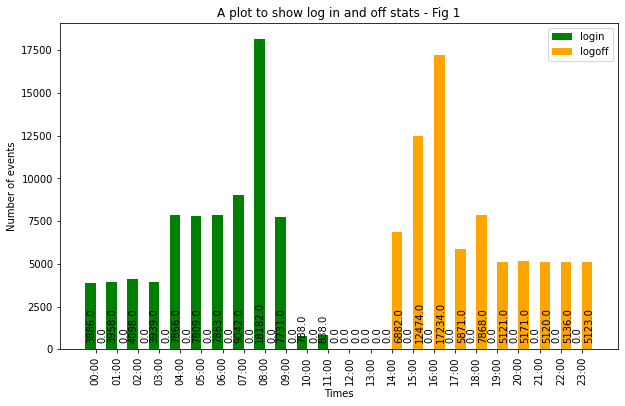

In [18]:

login = np.zeros(24)
logoff = np.zeros(24)

for index, row in login_data.iterrows():
    if row["action"] == 'login':
        login[row["datetime"].hour] += 1
    elif row["action"] == 'logoff':
        logoff[row["datetime"].hour] += 1
   
times = []
for i in range(0,24):
    times.append(f'{str(i).zfill(2)}:00')
    

plt.figure(figsize=(10,6))
plt.bar(np.arange(0,24), login, label='login', color='green', width=0.5)    
plt.bar(np.arange(0.5,24.5,1), logoff, label='logoff', color='orange', width=0.5)

for x in range(24):
    plt.text(x-0.2, 500, f'{str(login[x])}\n{str(logoff[x])}', rotation=90)
    
plt.xticks(ticks=np.arange(0.25,24.25,1), labels=times, rotation=90)
plt.title("A plot to show log in and off stats - Fig 1")
plt.ylabel("Number of events")
plt.xlabel("Times")
plt.legend()
plt.show() 

I've tried finding outling cases of loging in or out at suspusious times. But it appears the people at this company work some strange hours. However, considering the disriputuion is fairly even it doesn't look like anything is out of place at first glance.

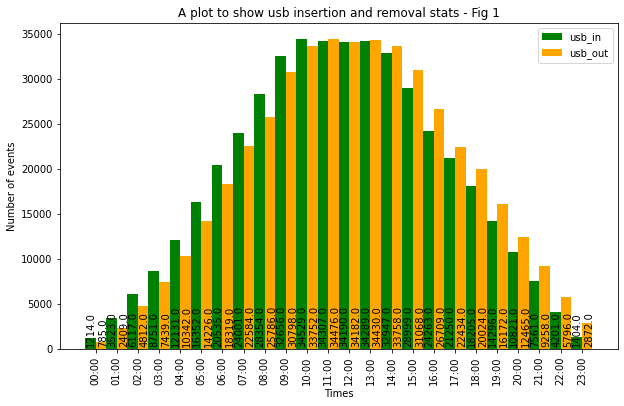

In [19]:
#chart the usb data like I have done above
usb_data

usb_in = np.zeros(24)
usb_out = np.zeros(24)

for index, row in usb_data.iterrows():
    if row["action"] == 'usb_insert':
        usb_in[row["datetime"].hour] += 1
    elif row["action"] == 'usb_remove':
        usb_out[row["datetime"].hour] += 1
   
times = []
for i in range(0,24):
    times.append(f'{str(i).zfill(2)}:00')
    

plt.figure(figsize=(10,6))
plt.bar(np.arange(0,24), usb_in, label='usb_in', color='green', width=0.5)    
plt.bar(np.arange(0.5,24.5,1), usb_out, label='usb_out', color='orange', width=0.5)

for x in range(24):
    plt.text(x-0.2, 500, f'{str(usb_in[x])}\n{str(usb_out[x])}', rotation=90)
    
plt.xticks(ticks=np.arange(0.25,24.25,1), labels=times, rotation=90)
plt.title("A plot to show usb insertion and removal stats - Fig 1")
plt.ylabel("Number of events")
plt.xlabel("Times")
plt.legend()
plt.show() 

So the above graph also shows a even distrubtion of usb inserts and removals. At first glance there is nothing that I would assume to be worring. 

In the following code blocks I will try to find if any users access private files or files that are outside of their departamental norms.

In [20]:
all_unique_files =file_data['filename'].unique()
all_unique_files

array(['/docs/details', '/system/suppliers', '/src', '/docs',
       '/docs/employment', '/dev', '/security/physical', '/etc',
       '/system/source', '/bin', '/security/ids', '/system',
       '/private/staffreview', '/security', '/docs/ip',
       '/docs/resignation', '/security/estates', '/private',
       '/private/FYEO', '/private/staffpay', '/security/grounds',
       '/docs/clients', '/system/site'], dtype=object)

In [21]:

#finding which deparments access which files.
all_roles
user_set


files_accessed_per_dep = {}
for role in all_roles:
    
    file_tracker = []
    file_data_per_role = file_data[file_data['user'].isin(user_set[role])]
    
    filenames = file_data_per_role['filename'].tolist()
    list_of_files = file_data_per_role['filename'].unique()
    
    for file in list_of_files:
        file_tracker.append([file, filenames.count(file)])
        
    files_accessed_per_dep[role] = file_tracker
files_accessed_per_dep


{'Technical': [['/docs/details', 167069],
  ['/system/suppliers', 168234],
  ['/src', 167962],
  ['/docs', 167574],
  ['/dev', 167276],
  ['/etc', 167644],
  ['/system/source', 167465],
  ['/bin', 168193],
  ['/security/ids', 167260],
  ['/system', 167692],
  ['/security', 167255],
  ['/docs/ip', 167906]],
 'Security': [['/security/physical', 30804],
  ['/docs', 31853],
  ['/security/estates', 30678],
  ['/security', 30838],
  ['/security/grounds', 30656],
  ['/system/site', 976],
  ['/system/suppliers', 925],
  ['/docs/clients', 932],
  ['/system', 953]],
 'Director': [['/docs/employment', 76585],
  ['/private/staffreview', 76569],
  ['/docs/resignation', 76617],
  ['/docs', 76128],
  ['/private', 76450],
  ['/private/FYEO', 76441],
  ['/private/staffpay', 76566],
  ['/docs/clients', 30]],
 'Finance': [['/docs', 115982], ['/docs/clients', 115528]],
 'Services': [['/docs/clients', 35674],
  ['/system/site', 35764],
  ['/docs', 36443],
  ['/system', 35888],
  ['/system/suppliers', 36145

Now I've broken the file access down into a dictionary. That uses the roles as keys. The values are the files that each department accessed and the amount of times it was accessed. 
Next I'm going to check if there are files that have been access much less that others. As this could indicate suspicious activity.

In [22]:
import statistics

file_access_outliers = {}
for role in all_roles: 
    files = files_accessed_per_dep[role]
    accessed_count = [x[1] for x in files]
    mean = statistics.mean(accessed_count)
    tracker=[]
    for file in files:
        tollerance = mean-(mean/2) #files access %50 per cent less will show up
        if file[1] < tollerance:
            tracker.append(file)
            
    file_access_outliers[role] = tracker
    
file_access_outliers
    

{'Technical': [],
 'Security': [['/system/site', 976],
  ['/system/suppliers', 925],
  ['/docs/clients', 932],
  ['/system', 953]],
 'Director': [['/docs/clients', 30]],
 'Finance': [],
 'Services': [['/security/estates', 875],
  ['/security/physical', 932],
  ['/security/grounds', 864],
  ['/security', 903]],
 'Legal': [],
 'HR': [['/security/physical', 30804],
  ['/security/estates', 30678],
  ['/security', 30838],
  ['/security/grounds', 30656],
  ['/docs/clients', 35674],
  ['/system/site', 35764],
  ['/system', 35888],
  ['/system/suppliers', 36145]]}

When the file access has been filtered down to files accessed %50 less than average we get the above results. 
There are a few files that pop up, however after further review most don't seem that bad, and the numbers aren't wildly inconsistant from each other. 
There is one case that concerns me though. With the Director group accessing the /docs/clients file only 30 times. This does seem a little bit suspisous. So I will now investigate further. 

['usr-qsw' 'usr-dnf' 'usr-qyp' 'usr-yaj' 'usr-xaz' 'usr-cxk' 'usr-kzq'
 'usr-idg' 'usr-qpr' 'usr-erl' 'usr-bsf' 'usr-eti' 'usr-yuk' 'usr-wcz'
 'usr-hnj' 'usr-mhn' 'usr-des' 'usr-dko' 'usr-riy' 'usr-llu' 'usr-duv'
 'usr-fop' 'usr-wco' 'usr-dof' 'usr-qwq' 'usr-vbz' 'usr-uqm' 'usr-cfo'
 'usr-lwa' 'usr-ace' 'usr-ent' 'usr-pai' 'usr-bsb' 'usr-qgs' 'usr-oft'
 'usr-jsh' 'usr-yqu' 'usr-bbj']
['/docs/clients' '/system/site' '/system' '/system/suppliers']


<function matplotlib.pyplot.show(close=None, block=None)>

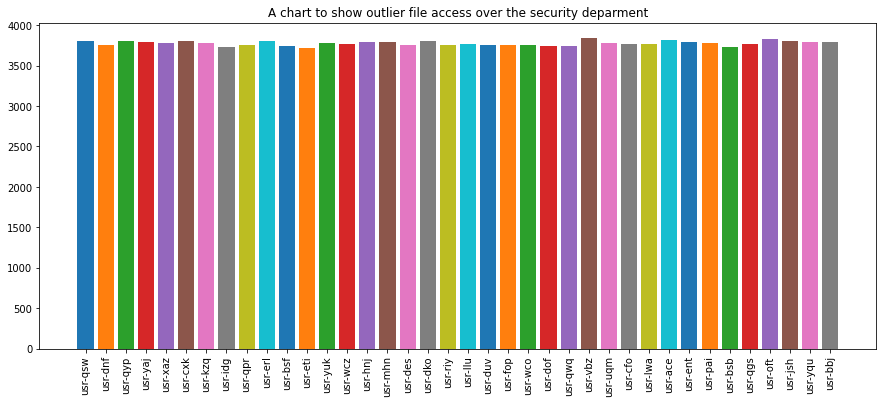

In [23]:
security_file_outliers = [x[0] for x in file_access_outliers['Security']]
security_outliers = file_data[(file_data['user'].isin(user_set['Services'])) & (file_data['filename'].isin(security_file_outliers))]
print(sec_outlier_users :=security_outliers['user'].unique())
print(security_outliers['filename'].unique())
all_sec_users = security_outliers['user'].tolist()

plt.figure(figsize=(15,6))
for user in sec_outlier_users:
    plt.bar(user, all_sec_users.count(user))
plt.title("A chart to show outlier file access over the security deparment")
plt.xticks(rotation=90)
plt.show


The outlier file access across security looks pretty uniform and so I don't see this as being problem.

['usr-mbh' 'usr-ccp' 'usr-hfa' 'usr-odk' 'usr-qef' 'usr-pnn' 'usr-piw'
 'usr-diy' 'usr-fzc' 'usr-tqd' 'usr-nez' 'usr-mtg' 'usr-bgx' 'usr-qpj'
 'usr-vmc' 'usr-qsw' 'usr-dnf' 'usr-goz' 'usr-qyp' 'usr-yaj' 'usr-xaz'
 'usr-cxk' 'usr-kzq' 'usr-idg' 'usr-qpr' 'usr-erl' 'usr-bsf' 'usr-epj'
 'usr-eti' 'usr-yuk' 'usr-wcz' 'usr-hnj' 'usr-xxb' 'usr-zaj' 'usr-yqx'
 'usr-mhn' 'usr-tvh' 'usr-yqu' 'usr-des' 'usr-dko' 'usr-riy' 'usr-llu'
 'usr-duv' 'usr-fop' 'usr-ams' 'usr-wco' 'usr-dof' 'usr-qwq' 'usr-vbz'
 'usr-yhi' 'usr-uqm' 'usr-cfo' 'usr-lwa' 'usr-ace' 'usr-yis' 'usr-ent'
 'usr-byi' 'usr-pai' 'usr-bsb' 'usr-qgs' 'usr-pfx' 'usr-npq' 'usr-oft'
 'usr-kga' 'usr-jsh' 'usr-cgh' 'usr-omh' 'usr-vhn' 'usr-zbv' 'usr-lgk'
 'usr-gdp' 'usr-bbj']
['/security/physical' '/security/estates' '/security' '/security/grounds'
 '/docs/clients' '/system/site' '/system' '/system/suppliers']


<function matplotlib.pyplot.show(close=None, block=None)>

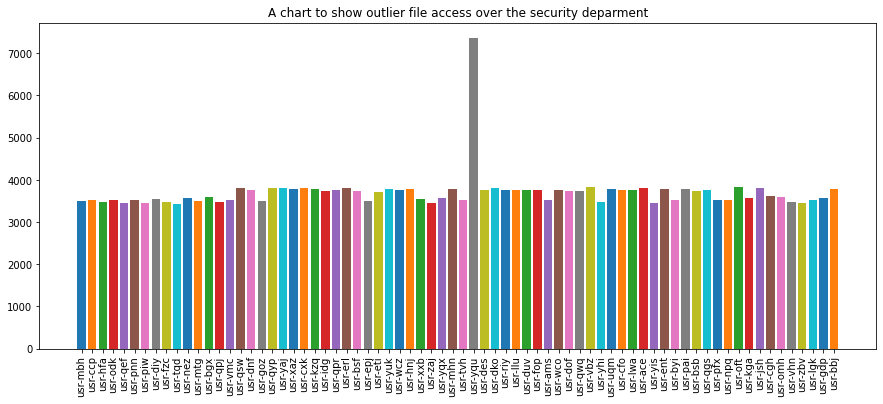

In [24]:
hr_file_outliers = [x[0] for x in file_access_outliers['HR']]
hr_outliers = file_data[(file_data['user'].isin(user_set['HR'])) & (file_data['filename'].isin(hr_file_outliers))]
print(hr_outlier_users :=hr_outliers['user'].unique())
print(hr_outliers['filename'].unique())
all_hr_users = hr_outliers['user'].tolist()

plt.figure(figsize=(15,6))
for user in hr_outlier_users:
    plt.bar(user, all_hr_users.count(user))
plt.title("A chart to show outlier file access over the security deparment")
plt.xticks(rotation=90)
plt.show


when looking at the file data access for HR we can see that one user accessed many more files than any other. I will investigate this further.

['/docs' '/security/estates' '/security/physical' '/system/site'
 '/system/suppliers' '/security/grounds' '/docs/clients' '/system'
 '/security']


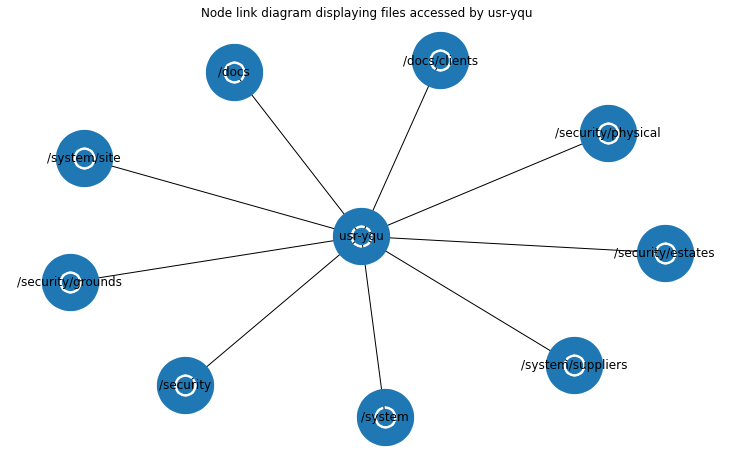

In [25]:
yqu_file_data = file_data[file_data['user'] == 'usr-yqu']
print(unique_yqu_files := yqu_file_data['filename'].unique())

G= nx.Graph()
nodes = [*unique_yqu_files, 'usr-yqu']
G.add_nodes_from(nodes)
G.add_edges_from([('usr-yqu', x) for x in unique_yqu_files])

plt.figure(figsize=(10,6))
nx.draw(G, with_labels = True, linewidths=40)
plt.title("Node link diagram displaying files accessed by usr-yqu")
plt.show()



# Suspicoius activity 
usr-yqu has a lot of suspicoius file activity. This is raised red flags. When looking at the files they accessed displayed on the node link diagram above, they seem to be accessing files that look sensitive and not relavent to HR.

In [26]:
#a list of suspicous_users
suspicous_users.append('usr-ezr')

clients = file_data[file_data['filename'] == '/docs/clients']
clients[clients['user'].isin(user_set['Director'])]

datetime     user       filename
1671772 2022-05-05 02:22:03.974237  usr-ezr  /docs/clients
1671831 2022-05-05 02:38:46.023615  usr-ezr  /docs/clients
1671869 2022-05-05 02:56:25.142498  usr-ezr  /docs/clients
1671908 2022-05-05 03:07:00.155080  usr-ezr  /docs/clients
1672167 2022-05-05 04:20:28.106686  usr-ezr  /docs/clients
1672231 2022-05-05 04:36:07.020037  usr-ezr  /docs/clients
1672237 2022-05-05 04:37:24.041109  usr-ezr  /docs/clients
1672292 2022-05-05 04:52:01.445641  usr-ezr  /docs/clients
1672376 2022-05-05 05:08:37.683082  usr-ezr  /docs/clients
1672608 2022-05-05 05:50:37.699580  usr-ezr  /docs/clients
1672925 2022-05-05 06:32:31.319478  usr-ezr  /docs/clients
1673262 2022-05-05 07:10:35.269949  usr-ezr  /docs/clients
1673861 2022-05-05 08:08:29.059232  usr-ezr  /docs/clients
1675655 2022-05-05 10:04:13.158089  usr-ezr  /docs/clients
1676093 2022-05-05 10:26:25.509462  usr-ezr  /docs/clients
1676749 2022-05-05 11:03:07.180855  usr-ezr  /docs/clients
1677116 2022-05-05 11:22:57.589428  usr-ezr  /docs/clients
1679044 2022-05-05 12:59:09.194502  usr-ezr  /docs/clients
1679595 2022-05-05 13:25:44.591089  usr-ezr  /docs/clients
1681339 2022-05-05 15:05:11.318697  usr-ezr  /docs/clients
1682025 2022-05-05 15:56:02.908865  usr-ezr  /docs/clients
1682137 2022-05-05 16:03:17.943823  usr-ezr  /docs/clients
1682387 2022-05-05 16:26:01.818644  usr-ezr  /docs/clients
1682727 2022-05-05 16:57:40.403749  usr-ezr  /docs/clients
1683094 2022-05-05 17:31:17.973617  usr-ezr  /docs/clients
1683266 2022-05-05 17:47:28.496440  usr-ezr  /docs/clients
1683395 2022-05-05 18:00:38.150288  usr-ezr  /docs/clients
1683448 2022-05-05 18:05:32.623141  usr-ezr  /docs/clients
1684326 2022-05-05 19:46:38.188800  usr-ezr  /docs/clients
1684435 2022-05-05 20:00:32.912540  usr-ezr  /docs/clients

# Suspicious Event
I noticed more suspicious activity on the filtered file access dictionary.

The above dataframe shows that a user accessed the clients file 30 times in one day. This user, user usr-ezr, is a Director. They are also the only director on record to access this file. This is a major red flag. I would suggest that this is a security breach. 

I will now go on to investigate this user further. 

In [27]:
#find any usb data relating to usr-ezr
usb_data[usb_data['user'] == 'usr-ezr']

datetime     user      action     pc
394729 2022-05-12 19:32:56.753903  usr-ezr  usb_insert  pc249
394762 2022-05-12 19:51:08.339557  usr-ezr  usb_remove  pc249
394851 2022-05-12 20:56:39.215300  usr-ezr  usb_insert  pc249
394864 2022-05-12 21:05:35.081857  usr-ezr  usb_remove  pc249
406217 2022-05-16 17:06:04.017364  usr-ezr  usb_insert  pc249
406327 2022-05-16 17:51:52.061167  usr-ezr  usb_remove  pc249
406504 2022-05-16 19:07:47.812389  usr-ezr  usb_insert  pc249
406513 2022-05-16 19:12:19.605206  usr-ezr  usb_remove  pc249
415821 2022-05-20 07:49:04.043470  usr-ezr  usb_insert  pc249
415892 2022-05-20 08:13:16.510946  usr-ezr  usb_remove  pc249
418175 2022-05-20 20:38:06.136269  usr-ezr  usb_insert  pc249
418225 2022-05-20 21:23:13.319032  usr-ezr  usb_remove  pc249

Usr-ezr didn't use a USB on the day of the breach. There is nothing at first glance that raises suspicion about their usb useage.
Next I'll chech their email data.

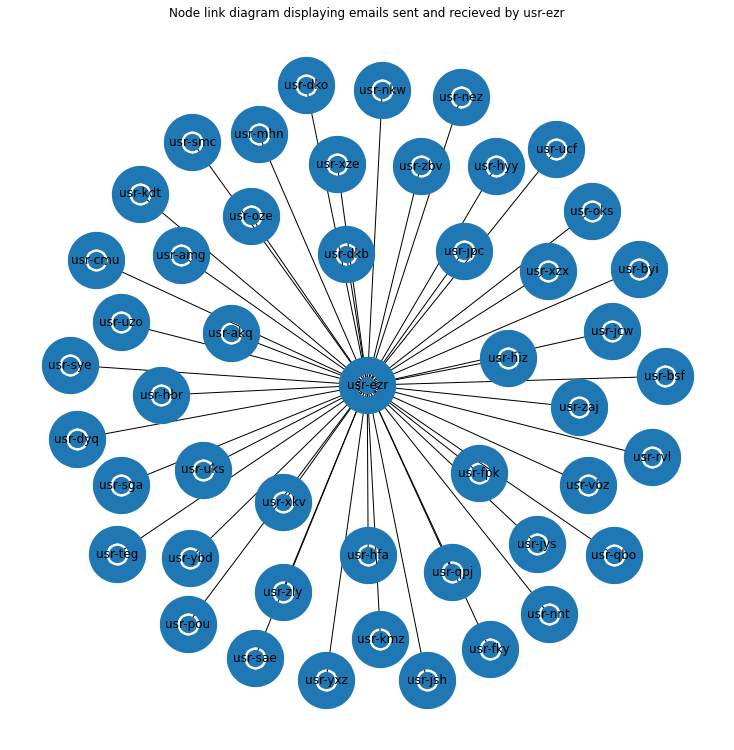

([<matplotlib.axis.YTick at 0x7f02b74943d0>,
 [Text(0, 0, '0'), Text(0, 1, '1'), Text(0, 2, '2'), Text(0, 3, '3')])

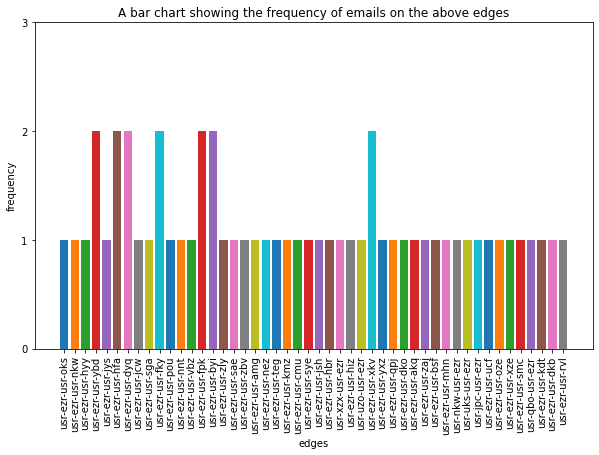

In [28]:
ezr = employee_data[employee_data['user'] == 'usr-ezr']
ezr_email = ezr['email'].iloc[0]

janfifth_email_data = email_data[(email_data['datetime'] >= '2022-05-05 00:00:00') & (email_data['datetime'] < '2022-05-06 00:00:00')]
janfifth_email_data
ezr_email_data = janfifth_email_data[(janfifth_email_data['sender'] == ezr_email) | (janfifth_email_data['recipient'] == ezr_email)]
ezr_email_data


ezr_edges = [(ezr_email_data['sender'].iloc[x].split('@')[0], ezr_email_data['recipient'].iloc[x].split('@')[0]) for x in range(len(ezr_email_data))]

edge_count = {}
for edge in ezr_edges:
    edge_count[edge] = ezr_edges.count(edge)

G= nx.Graph()
nodes = [*ezr_email_data['sender'].tolist(), *ezr_email_data['recipient'].tolist()]
nodes = list(dict.fromkeys(nodes))
nodes = [node.split('@')[0] for node in nodes]
G.add_nodes_from(nodes)
G.add_edges_from(ezr_edges)

plt.figure(figsize=(10,10))
nx.draw(G, with_labels = True, linewidths=40)
plt.title("Node link diagram displaying emails sent and recieved by usr-ezr")
plt.show()


plt.figure(figsize=(10,6))
for edge in edge_count.keys():
    x = f'{edge[0]}-{edge[1]}'
    plt.bar(x, edge_count[edge])

plt.title("A bar chart showing the frequency of emails on the above edges")
plt.xlabel("edges")
plt.ylabel("frequency")
plt.xticks(rotation=90)
plt.yticks([0,1,2,3], [0,1,2,3])


The above node diagram shows emails send to and from usr-ezr on the day of the suspicious event. But again at first glance I can't see anything troubling. The frequency of emails sent and recieved looks normal.

In [29]:
ezr_web = web_data[web_data['user'] == 'usr-ezr']
janfith_ezr_web = ezr_web[(ezr_web['datetime'] >= '2022-05-05 00:00:00') & (ezr_web['datetime'] < '2022-05-06 00:00:00')]

janfith_ezr_web

datetime     user                    website
1139135 2022-05-05 00:45:36.119283  usr-ezr     http://www.twitter.com
1139439 2022-05-05 03:38:44.230388  usr-ezr     http://www.twitter.com
1140152 2022-05-05 06:59:31.559583  usr-ezr  http://www.ieeexplore.com
1141479 2022-05-05 09:35:44.844832  usr-ezr    http://www.amazon.co.uk
1143352 2022-05-05 12:05:44.520506  usr-ezr       http://www.bbc.co.uk
1144817 2022-05-05 14:06:18.821253  usr-ezr    http://www.amazon.co.uk
1145071 2022-05-05 14:26:04.498845  usr-ezr    http://www.guardian.com
1145882 2022-05-05 15:48:40.310863  usr-ezr    http://www.amazon.co.uk
1147083 2022-05-05 18:21:10.108838  usr-ezr         http://www.sky.com
1147580 2022-05-05 20:03:14.023735  usr-ezr     http://www.twitter.com

A look at his web usage on that day also reveals nothing suspicious. It seems thier suspicious activity on this day is only to do with the files accessed. 

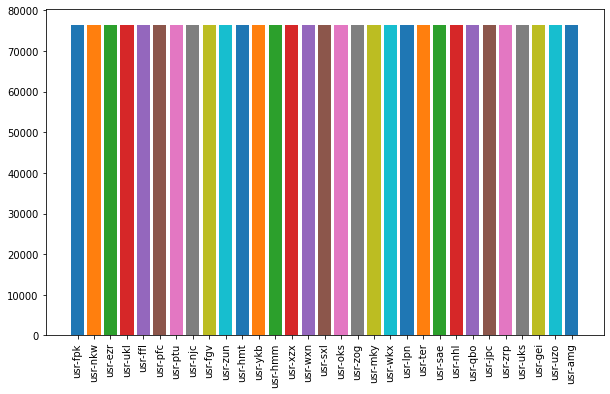

The above groups belong to the following groups: ['Director']


In [31]:

private_FYEO = file_data[file_data['filename'] == '/private/FYEO']
private_FYEO['user'].unique()

groups = []
plt.figure(figsize=(10,6))
for user in private_FYEO['user'].unique():
    for role in all_roles:
        if user in user_set[role]:
            groups.append(role)
    plt.bar(user, len(private_FYEO['user']))
plt.xticks(rotation=90)
plt.show()

groups = list(dict.fromkeys(groups))#get rid of duplicates
print(f"The above groups belong to the following groups: {groups}")



The above graph shows the amount of times a file named /private/FYEO was accessed. I'm assuming FYEO is an acronym for 'For Your Eye's Only'. If this assumption is correct it is concerning to see this much access to file that should be very private. I would suggest they password protect this file if it isn't already. If it is password protect it is likely this could be an indicator of a security breach. 

As all of these users are directors, it lowers my suspicion. This could just be a file they use to communicate between themselves or a group project they are working on.

Text(0.5, 0, 'website')

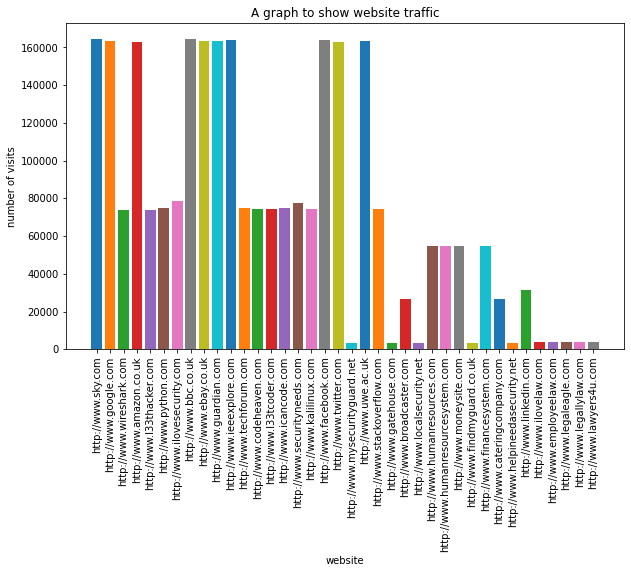

In [32]:
websites_accessed = web_data['website'].unique()
all_websites = web_data['website'].tolist()

plt.figure(figsize=(10,6))
visit_count = {}
for web in websites_accessed:
    visit_count[web] = all_websites.count(web)
    plt.bar(web, visit_count[web])
    
plt.title("A graph to show website traffic")
plt.xticks(rotation=90)
plt.ylabel("number of visits")
plt.xlabel("website")


I created this visualisation to help spot any outliers, however this alone doesn't tell me much so I will investigate further.

In [33]:
#find websites per department 
websites_accessed_per_dep = {}
for role in all_roles:
    
    web_tracker = []
    website_data_per_role = web_data[web_data['user'].isin(user_set[role])]
    
    websites = website_data_per_role['website'].tolist()
    list_of_websites = website_data_per_role['website'].unique()
    
    for web in list_of_websites:
        web_tracker.append([web, websites.count(web)])
        
    websites_accessed_per_dep[role] = web_tracker
    
websites_accessed_per_dep

{'Technical': [['http://www.sky.com', 74924],
  ['http://www.google.com', 74899],
  ['http://www.wireshark.com', 73815],
  ['http://www.amazon.co.uk', 74398],
  ['http://www.l33thacker.com', 73870],
  ['http://www.python.com', 74639],
  ['http://www.ilovesecurity.com', 75009],
  ['http://www.ebay.co.uk', 74817],
  ['http://www.guardian.com', 74287],
  ['http://www.ieeexplore.com', 74898],
  ['http://www.techforum.com', 74995],
  ['http://www.bbc.co.uk', 75225],
  ['http://www.codeheaven.com', 74580],
  ['http://www.l33tcoder.com', 74529],
  ['http://www.icancode.com', 74789],
  ['http://www.securityneeds.com', 74053],
  ['http://www.kalilinux.com', 74286],
  ['http://www.facebook.com', 74435],
  ['http://www.twitter.com', 73607],
  ['http://www.uwe.ac.uk', 74594],
  ['http://www.stackoverflow.com', 74224]],
 'Security': [['http://www.sky.com', 3562],
  ['http://www.google.com', 3444],
  ['http://www.mysecurityguard.net', 3513],
  ['http://www.ebay.co.uk', 3561],
  ['http://www.ieeexplo

In [34]:
web_access_outliers = {}
for role in all_roles: 
    websites = websites_accessed_per_dep[role]
    accessed_count = [x[1] for x in websites]
    mean = statistics.mean(accessed_count)
    tracker=[]
    for web in websites:
        tollerance = mean-(mean/2) #files access %50 per cent less will show up
        if web[1] < tollerance:
            tracker.append(web)
            
    web_access_outliers[role] = tracker
    
web_access_outliers

{'Technical': [],
 'Security': [['http://www.broadcaster.com', 71],
  ['http://www.cateringcompany.com', 68]],
 'Director': [['http://www.linkedin.com', 10],
  ['http://www.lawyers4u.com', 5]],
 'Finance': [],
 'Services': [['http://www.findmyguard.co.uk', 81],
  ['http://www.gatehouse.com', 108],
  ['http://www.securityneeds.com', 98],
  ['http://www.helpineedasecurity.net', 97],
  ['http://www.localsecurity.net', 101],
  ['http://www.mysecurityguard.net', 97],
  ['http://www.ilovesecurity.com', 104]],
 'Legal': [],
 'HR': [['http://www.mysecurityguard.net', 3513],
  ['http://www.securityneeds.com', 3403],
  ['http://www.gatehouse.com', 3342],
  ['http://www.ilovesecurity.com', 3436],
  ['http://www.broadcaster.com', 2852],
  ['http://www.localsecurity.net', 3463],
  ['http://www.findmyguard.co.uk', 3455],
  ['http://www.helpineedasecurity.net', 3335],
  ['http://www.cateringcompany.com', 2897]]}

Using the same techinque as with files I have filtered down the websites to ones used infrequently to spot outliers.

In [48]:
dir_access_outliers = [x[0] for x in web_access_outliers['Director']]
dir_web_data = web_data[(web_data['user'].isin(user_set['Director'])) & (web_data['website'].isin(dir_access_outliers))]
dir_web_data

datetime     user                   website
1239063 2022-05-16 01:38:49.028879  usr-ezr   http://www.linkedin.com
1239068 2022-05-16 01:47:55.140666  usr-ezr   http://www.linkedin.com
1239080 2022-05-16 01:59:47.084255  usr-ezr  http://www.lawyers4u.com
1239253 2022-05-16 03:59:41.385785  usr-ezr  http://www.lawyers4u.com
1239501 2022-05-16 05:18:17.134610  usr-ezr   http://www.linkedin.com
1239531 2022-05-16 05:28:18.282691  usr-ezr   http://www.linkedin.com
1240475 2022-05-16 08:22:37.507290  usr-ezr  http://www.lawyers4u.com
1241500 2022-05-16 09:56:54.617912  usr-ezr  http://www.lawyers4u.com
1242125 2022-05-16 10:45:19.161395  usr-ezr  http://www.lawyers4u.com
1242506 2022-05-16 11:14:52.484277  usr-ezr   http://www.linkedin.com
1242924 2022-05-16 11:46:29.641953  usr-ezr   http://www.linkedin.com
1246734 2022-05-16 17:38:52.860514  usr-ezr   http://www.linkedin.com
1246997 2022-05-16 18:16:15.672234  usr-ezr   http://www.linkedin.com
1247345 2022-05-16 19:05:52.230583  usr-ezr   http://www.linkedin.com
1247365 2022-05-16 19:08:50.166978  usr-ezr   http://www.linkedin.com

# Suspicious activity 
Another red flag raised with usr-ezr. This user is the only director to view these websites, and the only director to view anything to do with law. This is also dated after the first breach that I detected. Perhaps someone is getting worried about thier actions and has decided to look into hiring a lawyer? Could then be looking at the lawyers linkedin profile? It's suspicious that this happens on only one day and with only one user.

['usr-yqu']


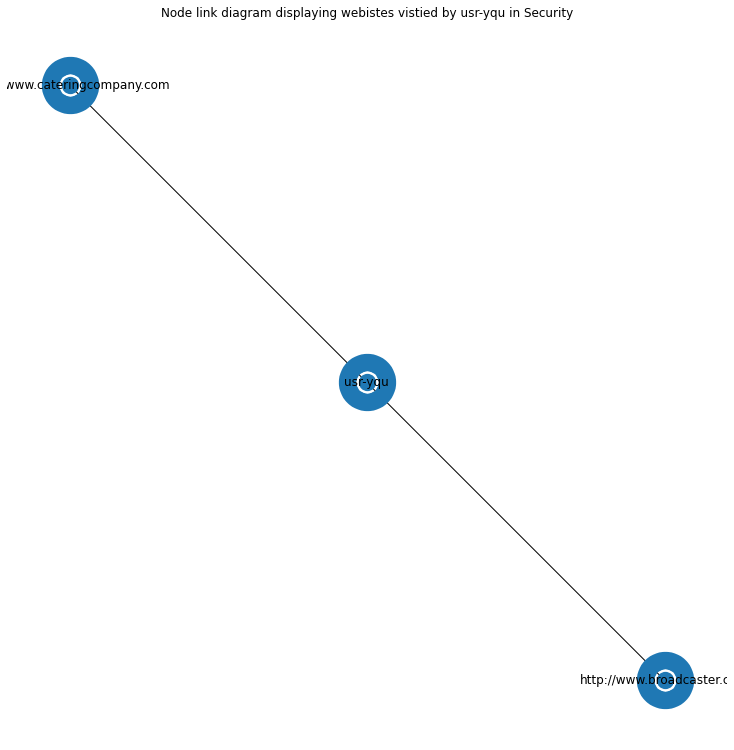

datetime     user                         website
11595   2022-01-02 10:15:15.647113  usr-yqu      http://www.broadcaster.com
23945   2022-01-03 15:13:34.495175  usr-yqu  http://www.cateringcompany.com
40734   2022-01-05 13:37:03.950614  usr-yqu  http://www.cateringcompany.com
50102   2022-01-06 13:51:32.773238  usr-yqu  http://www.cateringcompany.com
83902   2022-01-10 08:51:15.402317  usr-yqu      http://www.broadcaster.com
...                            ...      ...                             ...
2721873 2022-10-23 10:30:32.874638  usr-yqu  http://www.cateringcompany.com
2767629 2022-10-28 09:21:23.914404  usr-yqu  http://www.cateringcompany.com
2776628 2022-10-29 08:37:28.299091  usr-yqu      http://www.broadcaster.com
2786568 2022-10-30 10:07:26.294695  usr-yqu      http://www.broadcaster.com
2797287 2022-10-31 12:34:03.375041  usr-yqu  http://www.cateringcompany.com

[139 rows x 3 columns]

In [52]:
suspicous_users.append('usr-yqu')

security_outliers = web_data[(web_data['user'].isin(user_set['Security'])) & \
    ((web_data['website'] == 'http://www.broadcaster.com') | (web_data['website'] == 'http://www.cateringcompany.com'))]
print(security_outliers['user'].unique())

G= nx.Graph()
nodes = [*security_outliers['website'].unique(), 'usr-yqu']
edges = [('usr-yqu', x) for x in security_outliers['website'].unique()]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

plt.figure(figsize=(10,10))
nx.draw(G, with_labels = True, linewidths=40)
plt.title("Node link diagram displaying webistes vistied by usr-yqu in Security")
plt.show()

security_outliers

# Suspicious activity
The two website outliers were made by the same user. Although the websites seem to innocent they aren't related at all to security. Becuase of this I am flaging this as a possible consern.

['usr-yqu']
['http://www.findmyguard.co.uk' 'http://www.gatehouse.com'
 'http://www.securityneeds.com' 'http://www.helpineedasecurity.net'
 'http://www.localsecurity.net' 'http://www.mysecurityguard.net'
 'http://www.ilovesecurity.com']


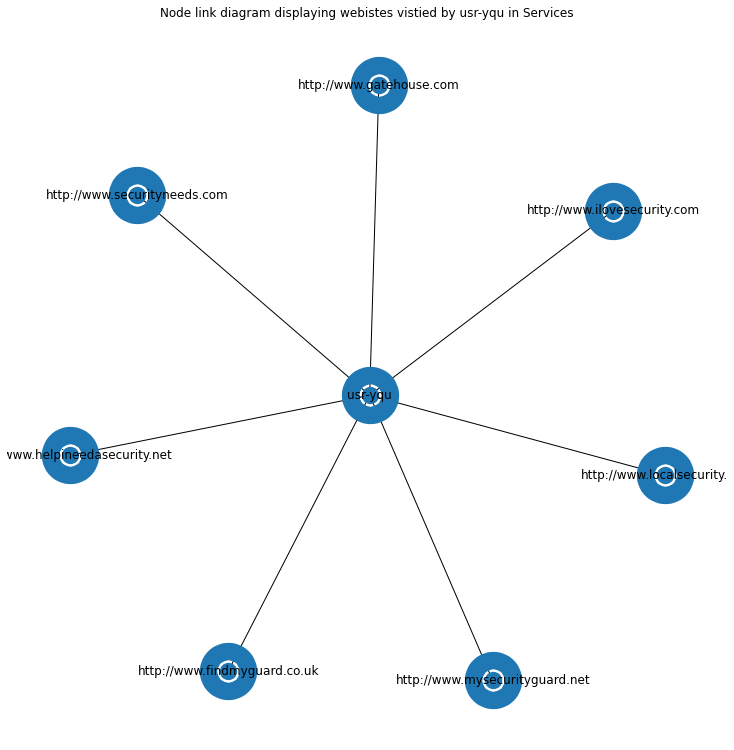

datetime     user                            website
1265    2022-01-01 07:35:15.740809  usr-yqu       http://www.findmyguard.co.uk
18115   2022-01-03 05:15:39.577615  usr-yqu       http://www.findmyguard.co.uk
22101   2022-01-03 12:40:50.704382  usr-yqu           http://www.gatehouse.com
24311   2022-01-03 15:55:00.655334  usr-yqu       http://www.securityneeds.com
27421   2022-01-04 06:53:38.851230  usr-yqu  http://www.helpineedasecurity.net
...                            ...      ...                                ...
2777087 2022-10-29 09:21:01.081538  usr-yqu           http://www.gatehouse.com
2784038 2022-10-30 02:42:02.661290  usr-yqu  http://www.helpineedasecurity.net
2792723 2022-10-31 03:36:04.158993  usr-yqu           http://www.gatehouse.com
2793065 2022-10-31 05:06:12.802072  usr-yqu     http://www.mysecurityguard.net
2796582 2022-10-31 11:43:40.406006  usr-yqu           http://www.gatehouse.com

[686 rows x 3 columns]

In [51]:
services_website_outliers = [x[0] for x in web_access_outliers['Services']]
services_outliers = web_data[(web_data['user'].isin(user_set['Services'])) & (web_data['website'].isin(services_website_outliers))]
print(services_outliers['user'].unique())
print(services_outliers['website'].unique())

G= nx.Graph()
nodes = [*services_outliers['website'].unique(), 'usr-yqu']
edges = [('usr-yqu', x) for x in services_outliers['website'].unique()]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

plt.figure(figsize=(10,10))
nx.draw(G, with_labels = True, linewidths=40)
plt.title("Node link diagram displaying webistes vistied by usr-yqu in Services")
plt.show()

services_outliers


# Suspicious activity
Another similar case. This one individual looking at websites that have nothing to do with their department. The websites don't look suspious, but why is just one person from this deparment looking at them. This is why I've flagged it as suspicous. It's the same person from the previous flag which makes me more suspicous. 

In [58]:
hr_website_outliers = [x[0] for x in web_access_outliers['HR']]
hr_outliers = web_data[(web_data['user'].isin(user_set['HR'])) & (web_data['website'].isin(hr_website_outliers))]
print(hr_outliers['user'].unique())
print(hr_outliers['website'].unique())

hr_outliers

['usr-mbh' 'usr-ccp' 'usr-xxb' 'usr-bgx' 'usr-tqd' 'usr-diy' 'usr-bsf'
 'usr-mtg' 'usr-cgh' 'usr-nez' 'usr-vmc' 'usr-fop' 'usr-yqu' 'usr-npq'
 'usr-goz' 'usr-riy' 'usr-lgk' 'usr-kga' 'usr-gdp' 'usr-tvh' 'usr-vhn'
 'usr-qpj' 'usr-qpr' 'usr-byi' 'usr-zbv' 'usr-hnj' 'usr-kzq' 'usr-yis'
 'usr-qwq' 'usr-pnn' 'usr-zaj' 'usr-yhi' 'usr-odk' 'usr-yqx' 'usr-dof'
 'usr-pai' 'usr-lwa' 'usr-llu' 'usr-pfx' 'usr-fzc' 'usr-ams' 'usr-epj'
 'usr-omh' 'usr-piw' 'usr-qef' 'usr-ent' 'usr-ace' 'usr-uqm' 'usr-bbj'
 'usr-qgs' 'usr-xaz' 'usr-hfa' 'usr-dko' 'usr-vbz' 'usr-wcz' 'usr-idg'
 'usr-dnf' 'usr-cxk' 'usr-qyp' 'usr-oft' 'usr-bsb' 'usr-mhn' 'usr-eti'
 'usr-wco' 'usr-jsh' 'usr-qsw' 'usr-yaj' 'usr-des' 'usr-duv' 'usr-erl'
 'usr-yuk' 'usr-cfo']
['http://www.mysecurityguard.net' 'http://www.securityneeds.com'
 'http://www.gatehouse.com' 'http://www.ilovesecurity.com'
 'http://www.broadcaster.com' 'http://www.localsecurity.net'
 'http://www.findmyguard.co.uk' 'http://www.helpineedasecurity.net'
 'http://www.ca

datetime     user                            website
58      2022-01-01 01:53:40.620494  usr-mbh     http://www.mysecurityguard.net
130     2022-01-01 02:29:44.870963  usr-mbh       http://www.securityneeds.com
170     2022-01-01 02:47:35.096039  usr-ccp           http://www.gatehouse.com
179     2022-01-01 02:51:19.377322  usr-xxb       http://www.ilovesecurity.com
187     2022-01-01 02:55:44.406765  usr-bgx       http://www.securityneeds.com
...                            ...      ...                                ...
2801098 2022-10-31 18:52:39.289525  usr-xxb  http://www.helpineedasecurity.net
2801212 2022-10-31 19:17:50.466308  usr-kga     http://www.mysecurityguard.net
2801272 2022-10-31 19:32:35.781003  usr-xxb       http://www.localsecurity.net
2801324 2022-10-31 19:45:42.843755  usr-omh  http://www.helpineedasecurity.net
2801533 2022-10-31 20:57:20.485938  usr-ccp       http://www.ilovesecurity.com

[29696 rows x 3 columns]

# Suspicous acticvity 
These users have been viewing websites that have nothing to do with their role, even though there are a lot of users doing this I still find it suspicous. I have noticed  usr-yqu pop up again though, so I will refine my search. 

['usr-yqu']
['http://www.findmyguard.co.uk' 'http://www.broadcaster.com'
 'http://www.gatehouse.com' 'http://www.cateringcompany.com'
 'http://www.securityneeds.com' 'http://www.helpineedasecurity.net'
 'http://www.localsecurity.net' 'http://www.mysecurityguard.net'
 'http://www.ilovesecurity.com']


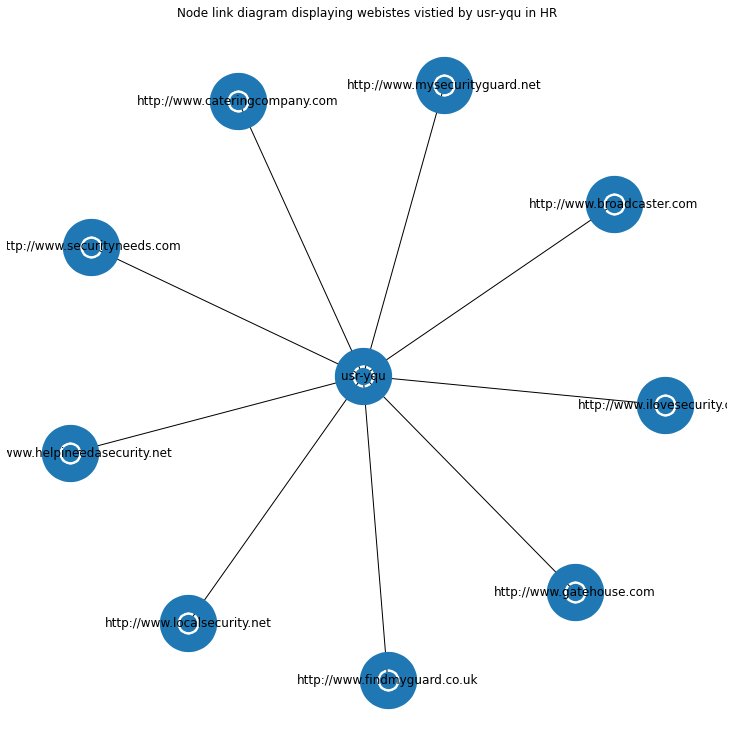

datetime     user                         website
1265    2022-01-01 07:35:15.740809  usr-yqu    http://www.findmyguard.co.uk
11595   2022-01-02 10:15:15.647113  usr-yqu      http://www.broadcaster.com
18115   2022-01-03 05:15:39.577615  usr-yqu    http://www.findmyguard.co.uk
22101   2022-01-03 12:40:50.704382  usr-yqu        http://www.gatehouse.com
23945   2022-01-03 15:13:34.495175  usr-yqu  http://www.cateringcompany.com
...                            ...      ...                             ...
2786568 2022-10-30 10:07:26.294695  usr-yqu      http://www.broadcaster.com
2792723 2022-10-31 03:36:04.158993  usr-yqu        http://www.gatehouse.com
2793065 2022-10-31 05:06:12.802072  usr-yqu  http://www.mysecurityguard.net
2796582 2022-10-31 11:43:40.406006  usr-yqu        http://www.gatehouse.com
2797287 2022-10-31 12:34:03.375041  usr-yqu  http://www.cateringcompany.com

[825 rows x 3 columns]

In [59]:
refinded_hr_outliers = hr_outliers[hr_outliers['user'].isin(suspicous_users)]
print(refinded_hr_outliers['user'].unique())
print(refinded_hr_outliers['website'].unique())

G= nx.Graph()
nodes = [*refinded_hr_outliers['website'].unique(), 'usr-yqu']
edges = [('usr-yqu', x) for x in refinded_hr_outliers['website'].unique()]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

plt.figure(figsize=(10,10))
nx.draw(G, with_labels = True, linewidths=40)
plt.title("Node link diagram displaying webistes vistied by usr-yqu in HR")
plt.show()

refinded_hr_outliers

# Suspicous activity
Once again usr-yqu looking at websites which are outside of their deparement. They also seem to be in a lot of deparments, this further raises my suspicions. 



In [40]:
usr_yqu_departments = []
for role in all_roles:
    if 'usr-yqu' in user_set[role]:
        usr_yqu_departments.append(role)
print(usr_yqu_departments)

['Security', 'Services', 'HR']


In [41]:
interdepartmental_users = []
for user in employee_data['user'].unique():
    deparment_count = 0
    for role in all_roles: 
        if user in user_set[role]:
            deparment_count+=1 
            
    if deparment_count > 1: 
        interdepartmental_users.append([user, deparment_count])

len(interdepartmental_users)

72

I was going to raise usr-yqu being in mulitple deparments as a concern but it appears a lot of users are interdeparmental

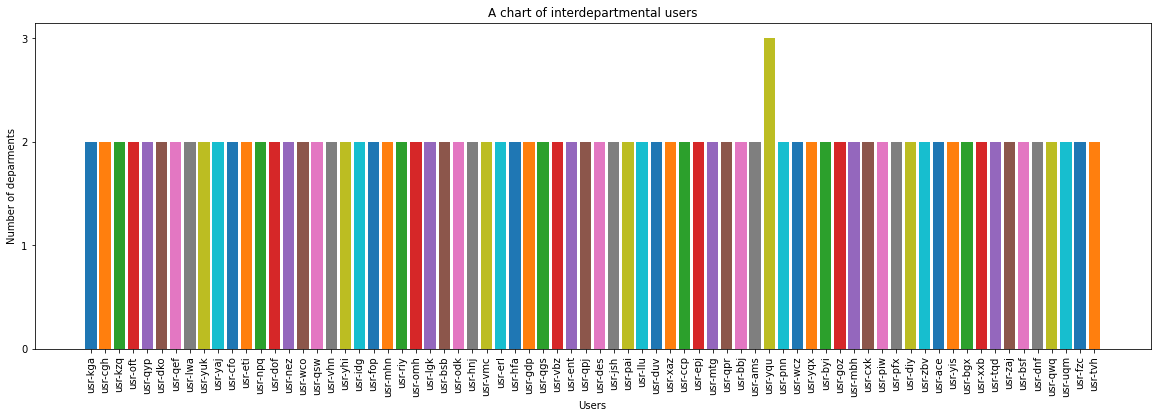

In [42]:
plt.figure(figsize=(20,6))
plt.title("A chart of interdepartmental users")
plt.xlabel('Users')
plt.ylabel('Number of deparments')
plt.yticks(np.arange(0,4), np.arange(0,4))
plt.xticks(rotation=90)

for user in interdepartmental_users:
    plt.bar(user[0], user[1])


# Suspicous activity 
Upon further inpection I have decided to raise this as a flag. As there are some interdeparmental users, however user usr-yqu is the only one that is in 3 departments.


Next I am going to investigate the login data of the two suspects. 

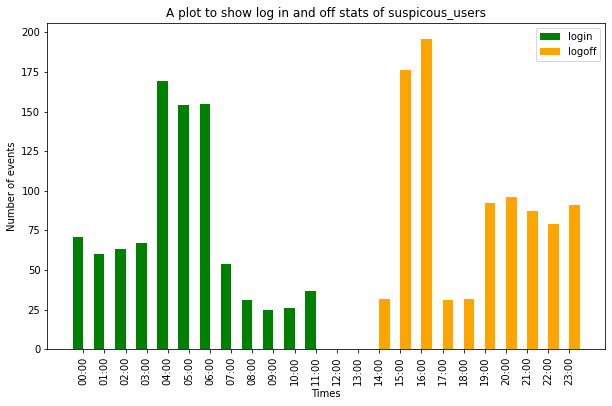

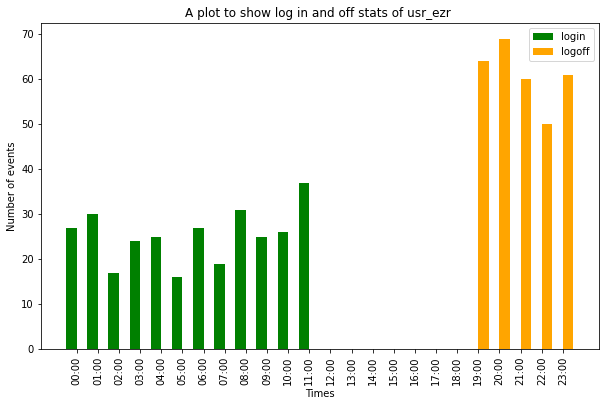

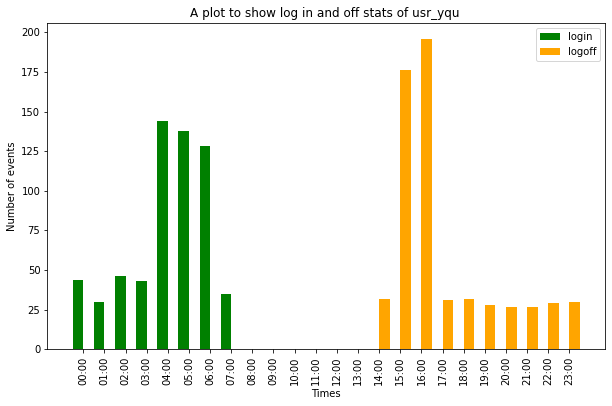

In [70]:
login = np.zeros(24)
logoff = np.zeros(24)

suspicous_users_login_data = login_data[login_data['user'].isin(suspicous_users)]
for index, row in suspicous_users_login_data.iterrows():
    if row["action"] == 'login':
        login[row["datetime"].hour] += 1
    elif row["action"] == 'logoff':
        logoff[row["datetime"].hour] += 1
   
times = []
for i in range(0,24):
    times.append(f'{str(i).zfill(2)}:00')
    

plt.figure(figsize=(10,6))
plt.bar(np.arange(0,24), login, label='login', color='green', width=0.5)    
plt.bar(np.arange(0.5,24.5,1), logoff, label='logoff', color='orange', width=0.5)
    
plt.xticks(ticks=np.arange(0.25,24.25,1), labels=times, rotation=90)
plt.title("A plot to show log in and off stats of suspicous_users")
plt.ylabel("Number of events")
plt.xlabel("Times")
plt.legend()
plt.show() 

login = np.zeros(24)
logoff = np.zeros(24)

usr_ezr = login_data[login_data['user'] == 'usr-ezr']

for index, row in usr_ezr.iterrows():
    if row["action"] == 'login':
        login[row["datetime"].hour] += 1
    elif row["action"] == 'logoff':
        logoff[row["datetime"].hour] += 1
    

plt.figure(figsize=(10,6))
plt.bar(np.arange(0,24), login, label='login', color='green', width=0.5)    
plt.bar(np.arange(0.5,24.5,1), logoff, label='logoff', color='orange', width=0.5)
    
plt.xticks(ticks=np.arange(0.25,24.25,1), labels=times, rotation=90)
plt.title("A plot to show log in and off stats of usr_ezr ")
plt.ylabel("Number of events")
plt.xlabel("Times")
plt.legend()
plt.show() 

login = np.zeros(24)
logoff = np.zeros(24)

usr_yqu = suspicous_users_login_data[suspicous_users_login_data['user'] == 'usr-yqu']
for index, row in usr_yqu.iterrows():
    if row["action"] == 'login':
        login[row["datetime"].hour] += 1
    elif row["action"] == 'logoff':
        logoff[row["datetime"].hour] += 1
    

plt.figure(figsize=(10,6))
plt.bar(np.arange(0,24), login, label='login', color='green', width=0.5)    
plt.bar(np.arange(0.5,24.5,1), logoff, label='logoff', color='orange', width=0.5)
    
plt.xticks(ticks=np.arange(0.25,24.25,1), labels=times, rotation=90)
plt.title("A plot to show log in and off stats of usr_yqu ")
plt.ylabel("Number of events")
plt.xlabel("Times")
plt.legend()
plt.show() 

# Suspicous Activity
usr-yqu has two groupings of regular log in and out activity. usually logging in around 4 -6 and out around 3- 4. But they have low levels of activity outside these hours. I would flag the activity outside of their normal login-out hours as suspicous. 

usr-ezr has irregular log in and out times when compared with the chart at the start of the investigation. such irregularity raises my concern. 

Next I am going to check which deparments the suspects have been assigned and if they are using ones they shouldn't.

In [92]:

for role in all_roles:
    if 'usr-yqu' in user_set[role]:
        if role not in ['Security', 'Services']:
            print(f'unautherized user found in user set {role}')

employee_data[employee_data['user'] == 'usr-yqu']


unautherized user found in user set HR


user      role                email     pc
166  usr-yqu  Security  usr-yqu@uwetech.com  pc166
202  usr-yqu  Services  usr-yqu@uwetech.com  pc202

In [94]:
for role in all_roles:
    if 'usr-ezr' in user_set[role]:
        if role not in ['Director']:
            print(f'unautherized user found in user set {role}')
            
employee_data[employee_data['user'] == 'usr-ezr']

user      role                email    pc
35  usr-ezr  Director  usr-ezr@uwetech.com  pc35

# Suspicous Activity 
According to the above dataframe usr-yqu is only in roles Security and Services. However they have made their way into the HR user set and have used this deparment to search files and the internet. 

Next I am going to check unauthorized usb access.

In [88]:
suspicous_users_usb_data = usb_data[usb_data['user'].isin(suspicous_users)]
suspicous_users_pc_access = {'usr-ezr' : ['pc35'], 'usr-yqu' : ['pc166', 'pc202']}

print(suspicous_users_usb_data['pc'].unique())
pc_used = {'usr-ezr' : [], 'usr-yqu' : []}
for index, row in suspicous_users_usb_data.iterrows(): 
    if row['pc'] not in pc_used[row['user']]:
        pc_used[row['user']].append(row['pc'])
        
print(suspicous_users_pc_access)
print(pc_used)
usb_data[(usb_data['user'] == 'usr-ezr') & (usb_data['pc'] == 'pc249')]


['pc202' 'pc249']
{'usr-ezr': ['pc35'], 'usr-yqu': ['pc166', 'pc202']}
{'usr-ezr': ['pc249'], 'usr-yqu': ['pc202']}


datetime     user      action     pc
394729 2022-05-12 19:32:56.753903  usr-ezr  usb_insert  pc249
394762 2022-05-12 19:51:08.339557  usr-ezr  usb_remove  pc249
394851 2022-05-12 20:56:39.215300  usr-ezr  usb_insert  pc249
394864 2022-05-12 21:05:35.081857  usr-ezr  usb_remove  pc249
406217 2022-05-16 17:06:04.017364  usr-ezr  usb_insert  pc249
406327 2022-05-16 17:51:52.061167  usr-ezr  usb_remove  pc249
406504 2022-05-16 19:07:47.812389  usr-ezr  usb_insert  pc249
406513 2022-05-16 19:12:19.605206  usr-ezr  usb_remove  pc249
415821 2022-05-20 07:49:04.043470  usr-ezr  usb_insert  pc249
415892 2022-05-20 08:13:16.510946  usr-ezr  usb_remove  pc249
418175 2022-05-20 20:38:06.136269  usr-ezr  usb_insert  pc249
418225 2022-05-20 21:23:13.319032  usr-ezr  usb_remove  pc249

# Suspicous Activity 
usr-ezr has used a pc that wasn't assigned to them. They have taken information out of this pc using a memory stick. It would appear they did this mulitple times over multiple days.  

Next I am going to check if any emails have left the company address book. 

In [44]:
all_known_emails = employee_data['email'].tolist()

all_emails_in_email_data = np.append(email_data['sender'].unique(), email_data['recipient'].unique())
all_emails_in_email_data = list(dict.fromkeys(all_emails_in_email_data))

for email in all_emails_in_email_data:
    if email not in all_known_emails:
        print(email)


The above block gave no output meaning no emails were sent outside of the company. It would be a red flag if there were emails being sent outside the company.

Next I would like to check the email activity of the suspects.

In [107]:
suspicous_emails_df = employee_data[employee_data['user'].isin(suspicous_users)]
suspicous_emails = suspicous_emails_df['email'].tolist()

send_recieve = email_data[email_data['sender'].isin(suspicous_emails) | email_data['recipient'].isin(suspicous_emails)].drop('datetime',axis=1)
send_recieve
send_recieve_dict = {}
for index, row in send_recieve.iterrows():
    
    sender = row['sender']
    recipient = row['recipient']
    key = f'{sender}-{recipient}'
    
    if key not in send_recieve_dict.keys():
        send_recieve_dict[key] = 1
    else:
        send_recieve_dict[key] += 1


In [117]:
mean = statistics.mean(send_recieve_dict.values())
tollerance = int(mean/2)*3 

['usr-fgv@uwetech.com-usr-yqu@uwetech.com', 'usr-bsf@uwetech.com-usr-yqu@uwetech.com', 'usr-fop@uwetech.com-usr-yqu@uwetech.com', 'usr-jpc@uwetech.com-usr-yqu@uwetech.com', 'usr-vhn@uwetech.com-usr-yqu@uwetech.com', 'usr-nkw@uwetech.com-usr-yqu@uwetech.com', 'usr-yqu@uwetech.com-usr-nez@uwetech.com', 'usr-yqu@uwetech.com-usr-yqu@uwetech.com', 'usr-yqu@uwetech.com-usr-hfa@uwetech.com', 'usr-yqu@uwetech.com-usr-vmc@uwetech.com', 'usr-ezr@uwetech.com-usr-yqu@uwetech.com', 'usr-yqu@uwetech.com-usr-lgk@uwetech.com', 'usr-qbo@uwetech.com-usr-yqu@uwetech.com', 'usr-yqu@uwetech.com-usr-diy@uwetech.com', 'usr-qpr@uwetech.com-usr-yqu@uwetech.com', 'usr-ukl@uwetech.com-usr-yqu@uwetech.com', 'usr-yqu@uwetech.com-usr-tvh@uwetech.com', 'usr-zrp@uwetech.com-usr-yqu@uwetech.com', 'usr-xzx@uwetech.com-usr-yqu@uwetech.com', 'usr-mky@uwetech.com-usr-yqu@uwetech.com', 'usr-sxl@uwetech.com-usr-yqu@uwetech.com', 'usr-yqu@uwetech.com-usr-qyp@uwetech.com', 'usr-ffl@uwetech.com-usr-yqu@uwetech.com', 'usr-yqu@u

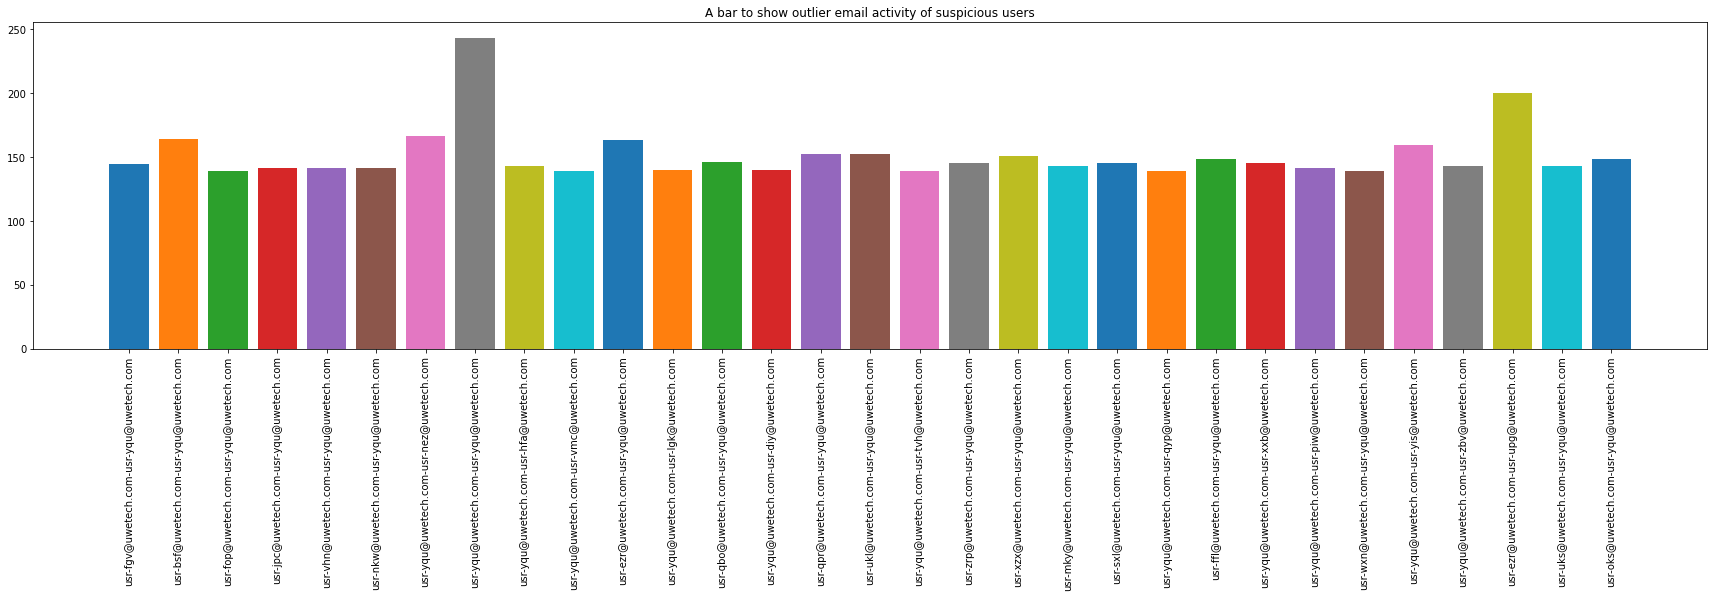

In [120]:
suspicous_edges = []
plt.figure(figsize=(30,6))
for key in send_recieve_dict.keys():
    if send_recieve_dict[key] > tollerance:
        suspicous_edges.append(key)
        plt.bar(key, send_recieve_dict[key])
plt.title('A bar to show outlier email activity of suspicious users')
plt.xticks(rotation=90)
print(suspicous_edges)
plt.show()


In [124]:
email_data[(email_data['sender'] == 'usr-ezr@uwetech.com') & (email_data['recipient'] == 'usr-yqu@uwetech.com')]

datetime               sender            recipient
10191   2022-01-01 15:34:21.459277  usr-ezr@uwetech.com  usr-yqu@uwetech.com
11410   2022-01-01 17:23:32.363452  usr-ezr@uwetech.com  usr-yqu@uwetech.com
14157   2022-01-02 04:59:40.765121  usr-ezr@uwetech.com  usr-yqu@uwetech.com
14446   2022-01-02 05:50:59.253149  usr-ezr@uwetech.com  usr-yqu@uwetech.com
36917   2022-01-03 16:00:24.298103  usr-ezr@uwetech.com  usr-yqu@uwetech.com
...                            ...                  ...                  ...
3990735 2022-10-22 15:49:52.536098  usr-ezr@uwetech.com  usr-yqu@uwetech.com
3991659 2022-10-22 17:06:56.611498  usr-ezr@uwetech.com  usr-yqu@uwetech.com
3993404 2022-10-22 20:32:12.387006  usr-ezr@uwetech.com  usr-yqu@uwetech.com
4021877 2022-10-25 01:43:56.478036  usr-ezr@uwetech.com  usr-yqu@uwetech.com
4076973 2022-10-29 06:33:27.812124  usr-ezr@uwetech.com  usr-yqu@uwetech.com

[163 rows x 3 columns]

In [126]:
email_data[(email_data['sender'] == 'usr-yqu@uwetech.com') & (email_data['recipient'] == 'usr-ezr@uwetech.com')]

Empty DataFrame
Columns: [datetime, sender, recipient]
Index: []

# Suspicous activity 
We can see in the about bar graph and data fram that usr-ezr has emailed usr-yqu an above average amount of times. Considering that both of these users are suspects I have raised this as suspicous activity. 

# Question 7: 
 Describe what you believe are the key findings of your investigation. You should clearly state the suspect identified, and the sequential order of suspicious events, including the date and time that these occurred. You should then provide your own critical reflection of what has occurred in this scenario, giving justification for any assumptions made. Limit your response to a maximum of 400 words.
Please make clear which dataset you have used for your investigation.

Dataset 4 

I believe either usr-ezr or usr-yqu to be the suspect.

After reading the announcement on black board I now see that only one user is meant to be suspicious and that because users are meant to only have one job role I need to ignore usr-yqu as they are in mulitple… along with quite a few other users as I discovered. 

I went though this data looking for outliers in activity. I highlighted these outliers by looking at departmental activity and the comparing the normal activity with outliers. By doing this I found suspicious event with 2 suspects. Although I believe the intended target was usr-ezr. They had the most convincing outliers. 

usr-ezr suspicious activity:

The only director to view the clients file. This user viewed this file 30 times on the 5th June. 
The only director to view linkedin or lawyers4u. Viewing both websites only on the 16th June.
This user also has irregular log in and out times. He has no normal log in time and sometimes logs in as earlier as 00:00. This is very suspicous compared to January when no one logged in before 7am.
This user also accessed a pc which they were not assigned to and plugged a USB into it. He did this on the 12th, 16th and 20th of June. 

I believe this Director (usr-ezr) has stolen a list of client data and is trying to sell it. I believe this because, this user accessed the client file when no other Director had done so. Then it seems they have loaded information from a HR members PC onto a USB stick. Perhaps they used this PC to avoid suspicion? Maybe they thought they could take the information from that PC as HR members regularly look at client data and so it could mask their track a bit. It seems like he took information on 3 separate days so rather than having 3 outliers on their PC they thought to use the HR PC. 
I would also assume that on the 16th of June this Director started to loose their nerve a bit and decided to look into a hiring a lawyer. I would assume based on the data, that they looked up the lawyer on lawyers4u and then viewed the lawyers linkedin page.

It seems they did a lot of this out of normal office hours aswell which only raises suspicion further.